In [2]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os

from classy import Class


params_lcdm = {
    'output':'lCl,tCl,mPk',
    'P_k_max_h/Mpc':10,
    'lensing':'y',
    'write background':'y',
    'input_verbose':10,
    'background_verbose':10,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

l_max_scalars = 2500
params_fe = {
    'output':'lCl,tCl,mPk',
    'P_k_max_h/Mpc':10,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'output_background_smg': 10,
    'gravity_model':'quintessence_extended_symmetron',
    'parameters_smg':'1e-30,1e-10,1,1,1e-20',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 2,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

k = 1e-4*np.array(range(1,60001))
l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)

cosmo = Class()

cosmo.set(params_fe)
cosmo.compute()

bkg_fe3=cosmo.get_background()
#print(bkg_fe3.viewkeys())
AgeFe3=cosmo.age()
print(cosmo.age())

prtt_fe3=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl3 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl3 = cosmo.lensed_cl(2500)
#lensed_cl3.viewkeys()

PK3=np.zeros(60000)
for i in range (0,59999):
    PK3[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()









cosmo = Class()

cosmo.set(params_lcdm)
cosmo.compute()

bkg_lcdm=cosmo.get_background()
AgeLCDM=cosmo.age()
print("LCDM: " + str(cosmo.age()))

PK_lcdm=np.zeros(60000)
for i in range (0,59999):
    PK_lcdm[i]=cosmo.pk(k[i],0)

prtt_lcdm=cosmo.get_perturbations()
#print(prtt.viewkeys())
#prt_lcdm=prtt_lcdm['scalar']
#prt_lcdm0=prt_lcdm[0]
#prt_lcdm1=prt_lcdm[1]
#print(prt[0].viewkeys())

raw_cl_lcdm = cosmo.raw_cl(l_max_scalars)
lensed_cl_lcdm = cosmo.lensed_cl(2500)

cosmo.struct_cleanup()
cosmo.empty()

13.808712414667513
LCDM: 13.808712383316225


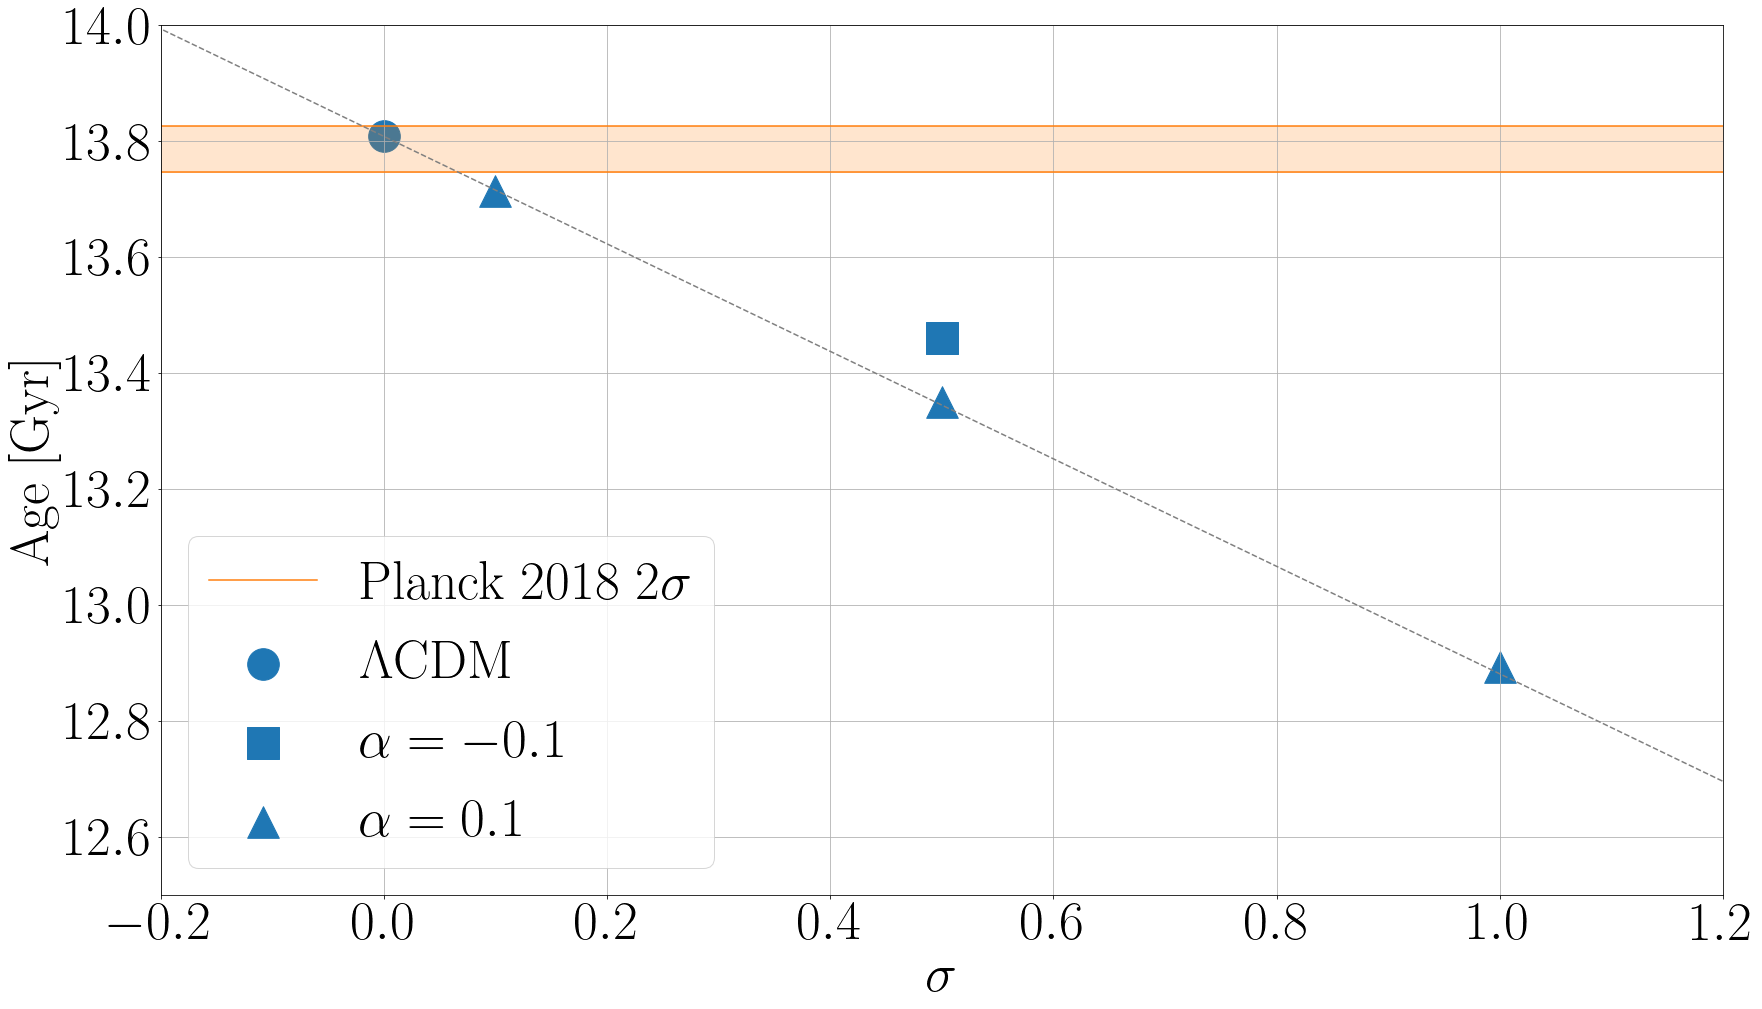

In [38]:
text_size=54
fig_size_x=28
fig_size_y=16

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

f,axarr = plt.subplots(1,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w')

X = np.array([0])
Y = np.array([AgeLCDM])
axarr.scatter(X,Y,s=1000,marker="o",c='#1f77b4')

X = np.array([0.5])
Y = np.array([AgeFe2])
axarr.scatter(X,Y,s=1000,marker="s",c='#1f77b4')

X = np.array([0.1,0.5,1])
Y = np.array([AgeFe4,AgeFe,AgeFe3])
c = ["yellow","blue","red","blue"]
axarr.scatter(X,Y,s=1000,marker="^",c='#1f77b4')

sigma = 2
x = [-10,10]
y_upper = [13.787+sigma*0.02,13.787+sigma*0.02]
y_lower = [13.787-sigma*0.02,13.787-sigma*0.02]
axarr.plot(x,y_lower,color='tab:orange',label="_nolegend_")
axarr.plot(x,y_upper,color='tab:orange',label="$2\sigma$ Planck 2018")

axarr.fill_between(x, y_lower, y_upper, alpha=0.2, color='tab:orange')

x = np.linspace(-1,2,100)
y = -0.927*x+AgeLCDM
plt.plot(x, y, '--', label="_nolegend_",color="gray")

#plt.xlim(-10,0)
axarr.set_ylim(12.5,14)
axarr.set_xlim(-0.2,1.2)
axarr.legend(["Planck 2018 $2\sigma$", "$\Lambda$CDM", "$\\alpha=-0.1$","$\\alpha=0.1$"])
#plt.title("$k=0.1$")
axarr.set_ylabel("Age $[$Gyr$]$")
axarr.set_xlabel("$\sigma$")

axarr.grid(True)

In [3]:
bkg_fe2

{'z': array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
        1.37816390e-02, 6.70033676e-03, 0.00000000e+00]),
 'proper time [Gyr]': array([7.51624445e-26, 7.62184017e-26, 7.72891940e-26, ...,
        1.32634453e+01, 1.33642761e+01, 1.34607369e+01]),
 'conf. time [Mpc]': array([4.60931915e-09, 4.64206096e-09, 4.67298378e-09, ...,
        1.39017131e+04, 1.39329444e+04, 1.39626178e+04]),
 'H [1/Mpc]': array([2.16967649e+22, 2.13961701e+22, 2.10997399e+22, ...,
        2.27223515e-04, 2.26253890e-04, 2.25342552e-04]),
 'H_prime': array([-9.41499215e+30, -9.22001336e+30, -9.02907247e+30, ...,
        -3.12188852e-08, -3.08749655e-08, -3.05515936e-08]),
 'comov. dist.': array([13962.61782878, 13962.61782878, 13962.61782878, ...,
           60.90469926,    29.67346208,     0.        ]),
 'ang.diam.dist.': array([1.39626178e-10, 1.40603562e-10, 1.41587786e-10, ...,
        6.00767433e+01, 2.94759632e+01, 0.00000000e+00]),
 'lum. dist.': array([1.39626178e+18, 1.38655589e+18, 1.3

In [98]:
# MG parametrization functions
# Features of Extended Quintessence:
#  - Sigma is scale-independent
#  - No explicit dependence on the potential

alpha   = 0.1
fourpiG = 0.5
Mpl2    = 1./(2. * fourpiG)

def bkg_extract(bkg, key, error_return = 0.):
    
    # H_prime_prime exception since is not available from background
    # Use a simple numerical derivative to compute it from H_prime
    if key == "H_prime_prime":
        H_prime_prime = []
        if "comov. dist." in bkg.keys() and "H_prime" in bkg.keys():
            H_prime = bkg["H_prime"]
            tau     = bkg["comov. dist."]
            for i, H_prime_i in enumerate(H_prime):
                # Need to remove the first point to have a meaningful definition
                # at t = today
                if i == 0:
                    H_prime_prime.append(1e-20)
                else:
                    H_prime_prime.append( (H_prime[i]-H_prime[i-1])/(tau[i]-tau[i-1]) )
            
            # Check H_prime_prime length
            if len(H_prime_prime) != len(H_prime):
                print("Error creating H_prime_prime vector!")
            return H_prime_prime
                
        else:
            return error_return
    
    else:
        if key in bkg.keys():
            return bkg[key]
        else:
            return error_return

def bkg_extract_one_value(bkg, key, redshift):
    
    z = bkg_extract(bkg, 'z')
    
    if redshift > 0:
        for i, value in enumerate(z):
            if value <= redshift:
                break
    else:
        i = len(z)-1
    
    if key != "":
        res = bkg_extract(bkg, key)
        return res[i]
    else:
        return None

def bkg_extract_generate_dictionary_at_z(bkg, redshift,
                                         keys=['z', 'phi_smg', 'phi_prime_smg', 'H [1/Mpc]', 'H_prime', 'H_prime_prime']):
    
    values = []
    for key in keys:
        values.append(bkg_extract_one_value(bkg, key, redshift))
    
    dictionary = {}
    for i, key in enumerate(keys):
        dictionary[key] = values[i]
        
    return dictionary
        
def fun_phi(bkg):
    return alpha * bkg_extract(bkg, 'phi_smg') * bkg_extract(bkg, 'phi_smg')

def fun_phi_prime(bkg):
    return 2. * alpha * bkg_extract(bkg, 'phi_smg')

def Omega(bkg):
    return 1. + fun_phi(bkg)

def beta2(bkg):
    return 1./(3.+4.*(1.+fun_phi(bkg))/(Mpl2*fun_phi_prime(bkg)**2.))

def M2(bkg):
    a             = 1./(1.+bkg_extract(bkg, "z"))
    phi_prime     = bkg_extract(bkg, "phi_prime_smg")
    H             = bkg_extract(bkg, "H [1/Mpc]")
    H_prime       = bkg_extract(bkg, "H_prime")
    H_prime_prime = bkg_extract(bkg, "H_prime_prime")
    return 3./a**2 * (Mpl2/2.*fun_phi_prime(bkg)*(H_prime_prime+H*H_prime-H**3.)-phi_prime*(H_prime-H**2.))/(3./4.*Mpl2*phi_prime*fun_phi_prime(bkg)**2/(1.+fun_phi(bkg)) + phi_prime)

def epsilon(k, bkg):
    """k should be in units of 1/Mpc (hi_class convention)"""
    a             = 1./(1.+bkg_extract(bkg, "z"))
    return beta2(bkg)/(1.+a**2/k**2 * M2(bkg))

def mu(k, bkg, minus1 = False, absolute = False):
    if minus1:
        if absolute:
            return abs( 1./Omega(bkg)*(1.+epsilon(k, bkg)) -1 )
        else:
            return 1./Omega(bkg)*(1.+epsilon(k, bkg)) - 1
    else:
        return 1./Omega(bkg)*(1.+epsilon(k, bkg))

def gamma(k, bkg, minus1 = False, absolute = False):
    if minus1:
        if absolute:
            return abs( (1.-epsilon(k, bkg))/(1.+epsilon(k, bkg))-1 )
        else:
            return (1.-epsilon(k, bkg))/(1.+epsilon(k, bkg))-1
    else:
        return (1.-epsilon(k, bkg))/(1.+epsilon(k, bkg))

def Sigma(k, bkg, minus1 = False, absolute = False):
    if minus1:
        if absolute:
            return abs( 1./Omega(bkg)-1 )
        else:
            return 1./Omega(bkg)-1
    else:
        return 1./Omega(bkg)

In [65]:
epsilon(1, bkg_fe4)

array([-7.35430319e-93, -5.45974443e-87, -1.11894257e-86, ...,
        1.02528001e-03,  1.03942849e-03,  1.05303466e-03])

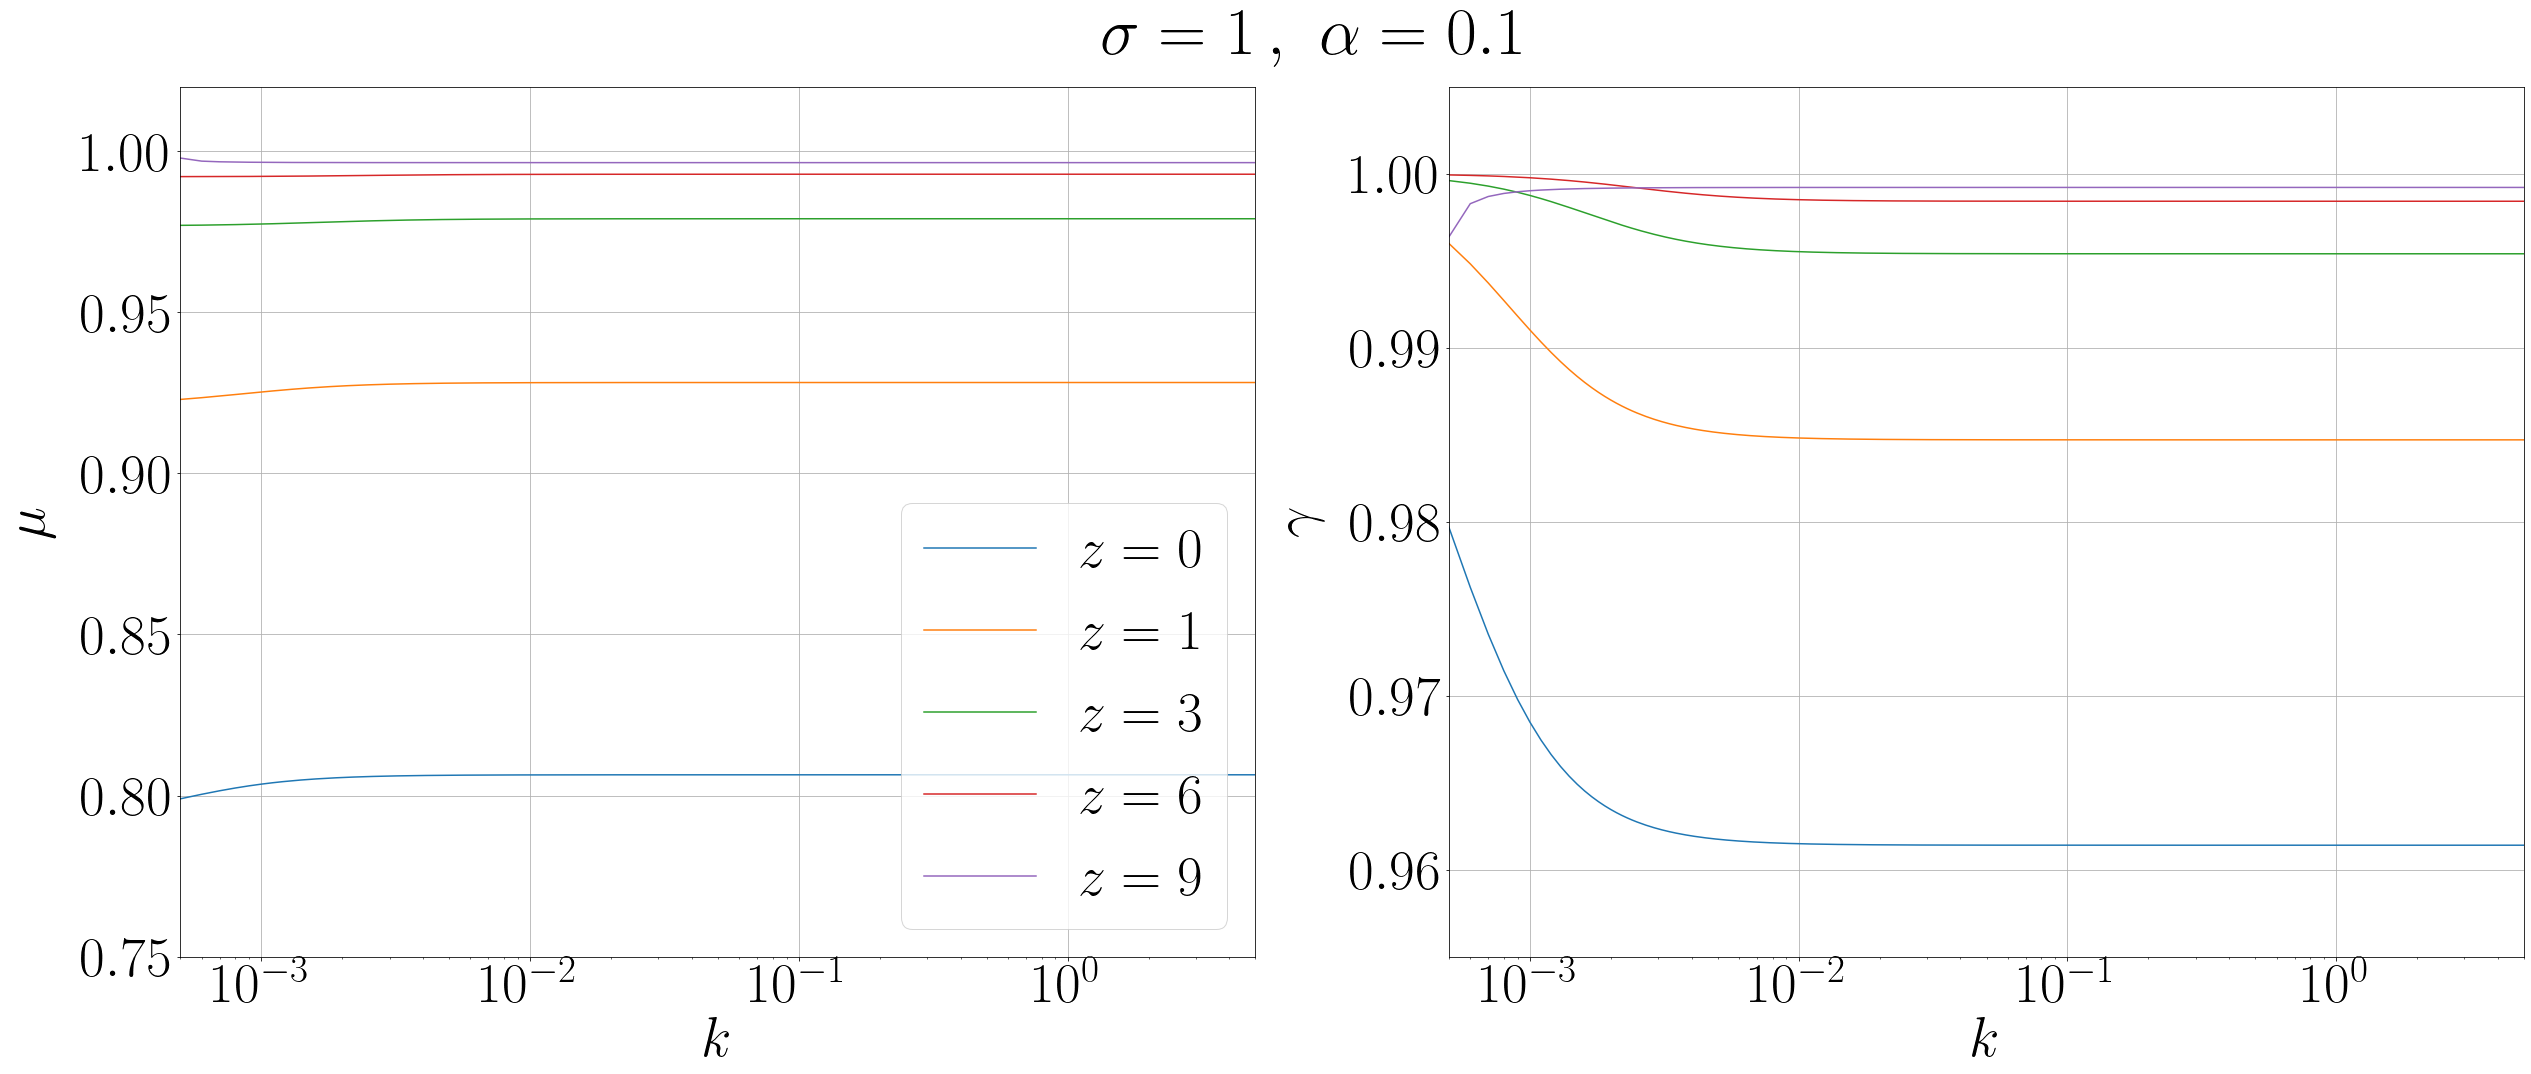

In [136]:
text_size=56
fig_size_x=42
fig_size_y=16

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

f,axarr = plt.subplots(1,2,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w')
k = 1e-4*np.array(range(1,60001))

#X = np.array([0.5,1])
#Y = np.array([AgeFe,AgeFe3])
#c = ["yellow","blue","red","blue"]

minus1 = False
absolute = False

axarr_c = axarr[0]
bkg_cc = bkg_fe3
bkg_c = bkg_extract_generate_dictionary_at_z(bkg_cc, 0)
xlim1 = 5e-4
xlim2 = 5
ylim1 = 0.75
ylim2 = 1.02

z_plot = [0,1,3,6,9]

#axarr_c.plot(k,k/k*Sigma(k,bkg_c,minus1=minus1,absolute=absolute),label="_")
for rs in z_plot:
    axarr_c.plot(k,mu(k,bkg_extract_generate_dictionary_at_z(bkg_cc, rs),minus1=minus1,absolute=absolute),label="$z = "+str(rs)+"$")
    #axarr_c.plot(k,gamma(k,bkg_extract_generate_dictionary_at_z(bkg_cc, rs),minus1=minus1,absolute=absolute),label="$$")

axarr[0].set_xscale("log")

#plt.xlim(-10,0)
axarr[0].set_ylim(ylim1,ylim2)
axarr[0].set_xlim(xlim1,xlim2)
axarr[0].legend(loc='lower right')
#axarr[0].set_title("$z=0$")
axarr[0].set_ylabel("$\\mu$")
axarr[0].yaxis.set_label_coords(-0.115, 0.5)
axarr[0].set_xlabel("$k$")

axarr[0].grid(True)


axarr_c = axarr[1]
bkg_c = bkg_extract_generate_dictionary_at_z(bkg_cc, 1)
z = bkg_extract(bkg_c, "z")
#ylim1 = 0.989
#ylim2 = 1.001

#axarr_c.plot(k,k/k*Sigma(k,bkg_c,minus1=minus1,absolute=absolute),label="$\\Sigma$")
for rs in z_plot:
    axarr_c.plot(k,gamma(k,bkg_extract_generate_dictionary_at_z(bkg_cc, rs),minus1=minus1,absolute=absolute),label="$z = "+str(rs)+"$")
axarr[1].set_xscale("log")

#plt.xlim(-10,0)
axarr[1].set_ylim(0.955,1.005)
axarr[1].set_xlim(xlim1,xlim2)
#axarr[1].legend()
#axarr[1].set_title("$z=1$")
#axarr[1].set_ylabel("Functions")
axarr[1].set_ylabel("$\gamma$")
axarr[1].yaxis.set_label_coords(-0.115, 0.5)
axarr[1].set_xlabel("$k$")

axarr[1].grid(True)

#axarr[0].spines['right'].set_visible(False)
#axarr[1].spines['left'].set_visible(False)
#axarr[1].axes.yaxis.set_ticklabels([])
#axarr[1].yaxis.tick_left()
#axarr[1].yaxis.tick_right()
#axarr[1].tick_params(labelright='off')

#axarr[1].set_yticks([1, 0.,0.99])

f.suptitle("$\\sigma=1\,, \,\,\\alpha=0.1$", y=0.95)

f.subplots_adjust(wspace=0.18)
f.subplots_adjust(hspace=0.18)

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_31196/431497862.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axarr[0].set_xlim(0,7)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_31196/431497862.py:67: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axarr[1].set_xlim(0,7)


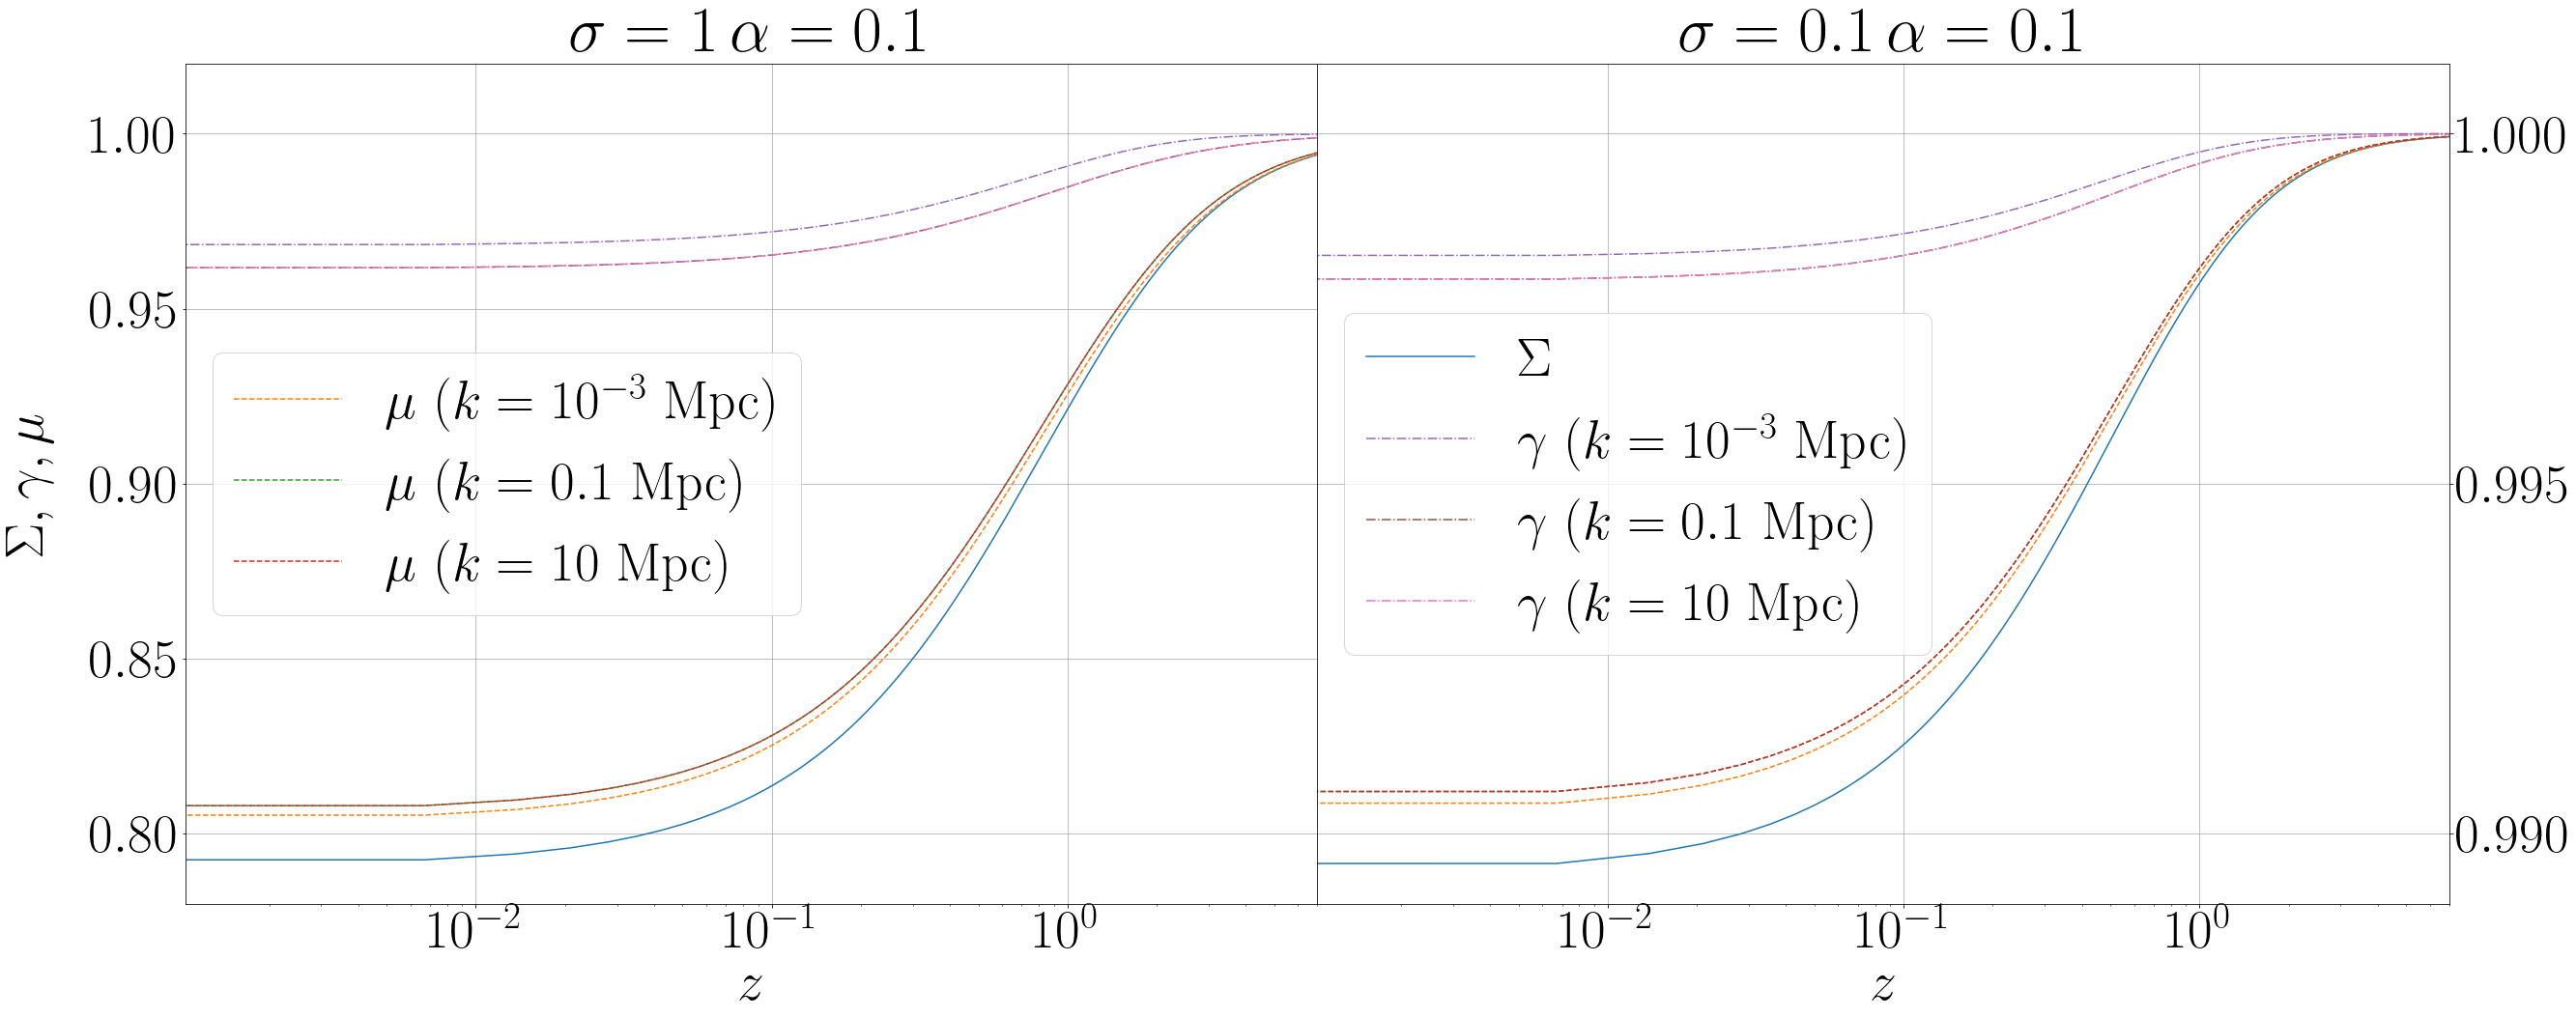

In [185]:
text_size=56
fig_size_x=42
fig_size_y=16

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

f,axarr = plt.subplots(1,2,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w')

#X = np.array([0.5,1])
#Y = np.array([AgeFe,AgeFe3])
#c = ["yellow","blue","red","blue"]

minus1 = False
absolute = False

axarr_c = axarr[0]
bkg_c = bkg_fe3
z = bkg_extract(bkg_c, "z")
ylim1 = 0.78
ylim2 = 1.02

axarr_c.plot(z,Sigma(0.,bkg_c,minus1=minus1,absolute=absolute),label="_")
axarr_c.plot(z,mu(1e-3,bkg_c,minus1=minus1,absolute=absolute),"--",label="$\\mu$ $(k = 10^{-3}$ Mpc$)$")
axarr_c.plot(z,mu(0.1,bkg_c,minus1=minus1,absolute=absolute),"--",label="$\\mu$  $(k = 0.1$ Mpc$)$")
axarr_c.plot(z,mu(1,bkg_c,minus1=minus1,absolute=absolute),"--",label="$\\mu$  $(k = 10$ Mpc$)$")
axarr_c.plot(z,gamma(1e-3,bkg_c,minus1=minus1,absolute=absolute),"-.",label="_")
axarr_c.plot(z,gamma(.1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="_")
axarr_c.plot(z,gamma(1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="_")

axarr[0].set_xscale("log")

#plt.xlim(-10,0)
axarr[0].set_ylim(ylim1,ylim2)
axarr[0].set_xlim(0,7)
axarr[0].legend()
axarr[0].set_title("$\\sigma=1 \,\\alpha=0.1$")
axarr[0].set_ylabel("$\\Sigma, \\gamma, \\mu$")
axarr[0].yaxis.set_label_coords(-0.115, 0.5)
axarr[0].set_xlabel("$z$")

axarr[0].grid(True)


axarr_c = axarr[1]
bkg_c = bkg_fe4
z = bkg_extract(bkg_c, "z")
ylim1 = 0.989
ylim2 = 1.001

axarr_c.plot(z,Sigma(0.,bkg_c,minus1=minus1,absolute=absolute),label="$\Sigma$")
axarr_c.plot(z,mu(1e-3,bkg_c,minus1=minus1,absolute=absolute),"--",label="_nolegend_")
axarr_c.plot(z,mu(0.1,bkg_c,minus1=minus1,absolute=absolute),"--",label="_nolegend_")
axarr_c.plot(z,mu(1,bkg_c,minus1=minus1,absolute=absolute),"--",label="_nolegend_")
axarr_c.plot(z,gamma(1e-3,bkg_c,minus1=minus1,absolute=absolute),"-.",label="$\\gamma$  $(k = 10^{-3}$ Mpc$)$")
axarr_c.plot(z,gamma(.1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="$\\gamma$  $(k = 0.1$ Mpc$)$")
axarr_c.plot(z,gamma(1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="$\\gamma$  $(k = 10$ Mpc$)$")

axarr[1].set_xscale("log")

#plt.xlim(-10,0)
axarr[1].set_ylim(ylim1,ylim2)
axarr[1].set_xlim(0,7)
axarr[1].legend()
axarr[1].set_title("$\\sigma=0.1 \,\\alpha=0.1$")
#axarr[1].set_ylabel("Functions")
axarr[1].set_xlabel("$z$")

axarr[1].grid(True)

#axarr[0].spines['right'].set_visible(False)
#axarr[1].spines['left'].set_visible(False)
#axarr[1].axes.yaxis.set_ticklabels([])
axarr[1].yaxis.tick_left()
axarr[1].yaxis.tick_right()
axarr[1].tick_params(labelright='off')

axarr[1].set_yticks([1, 0.995,0.99])

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_31196/1341150539.py:39: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axarr[0].set_xlim(0,9)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_31196/1341150539.py:67: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axarr[1].set_xlim(0,9)


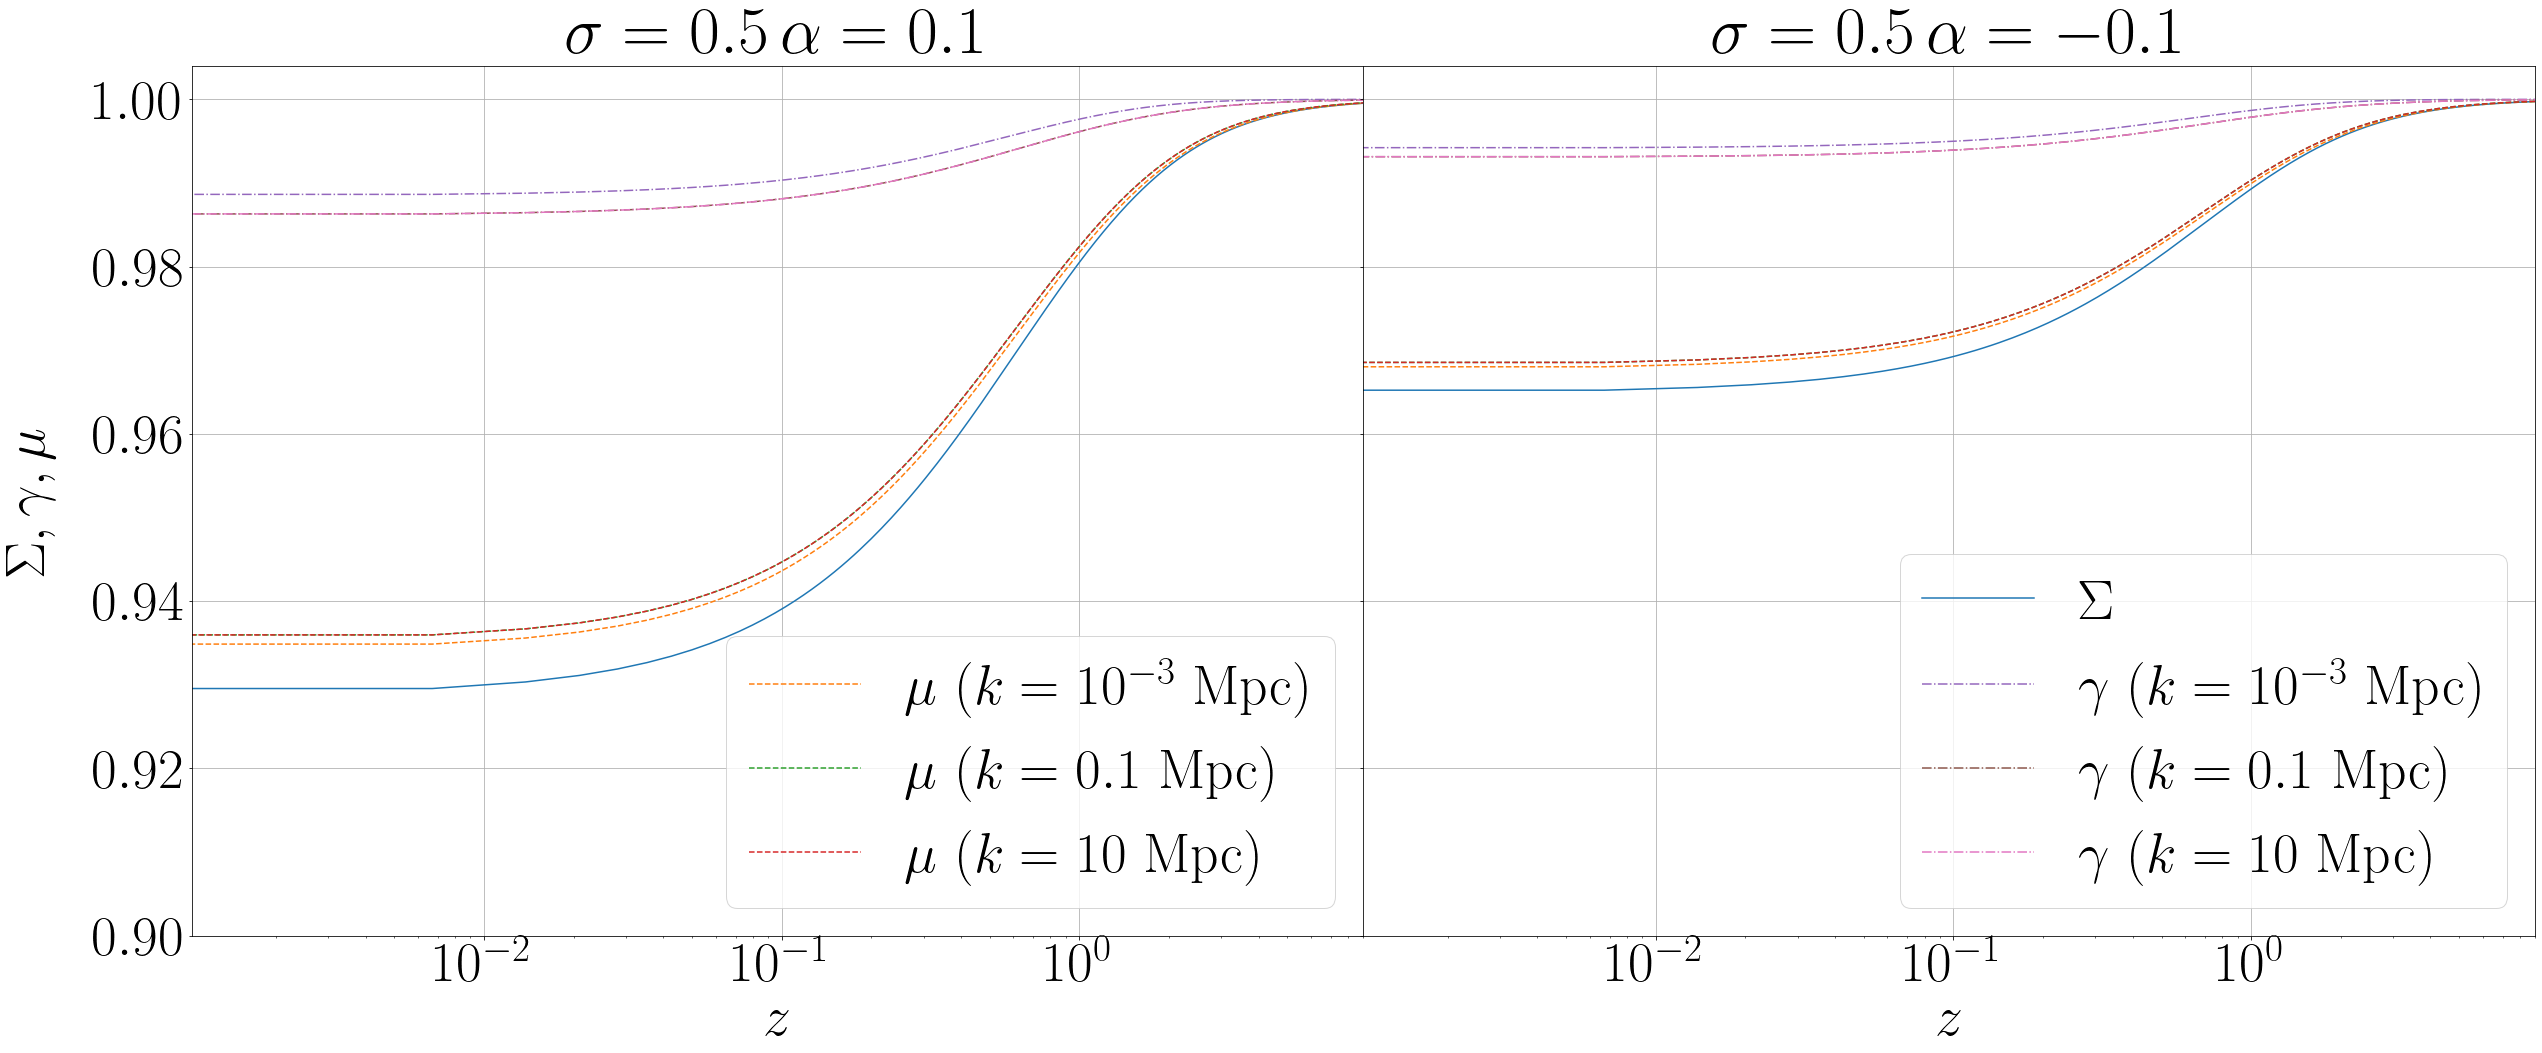

In [182]:
text_size=56
fig_size_x=42
fig_size_y=16

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

f,axarr = plt.subplots(1,2,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w')

#X = np.array([0.5,1])
#Y = np.array([AgeFe,AgeFe3])
#c = ["yellow","blue","red","blue"]

minus1 = False
absolute = False

axarr_c = axarr[0]
bkg_c = bkg_fe
z = bkg_extract(bkg_c, "z")
ylim1 = 0.9
ylim2 = 1.004

axarr_c.plot(z,Sigma(0.,bkg_c,minus1=minus1,absolute=absolute),label="_")
axarr_c.plot(z,mu(1e-3,bkg_c,minus1=minus1,absolute=absolute),"--",label="$\\mu$ $(k = 10^{-3}$ Mpc$)$")
axarr_c.plot(z,mu(0.1,bkg_c,minus1=minus1,absolute=absolute),"--",label="$\\mu$  $(k = 0.1$ Mpc$)$")
axarr_c.plot(z,mu(1,bkg_c,minus1=minus1,absolute=absolute),"--",label="$\\mu$  $(k = 10$ Mpc$)$")
axarr_c.plot(z,gamma(1e-3,bkg_c,minus1=minus1,absolute=absolute),"-.",label="_")
axarr_c.plot(z,gamma(.1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="_")
axarr_c.plot(z,gamma(1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="_")

axarr[0].set_xscale("log")

#plt.xlim(-10,0)
axarr[0].set_ylim(ylim1,ylim2)
axarr[0].set_xlim(0,9)
axarr[0].legend(loc="lower right")
axarr[0].set_title("$\\sigma=0.5 \,\\alpha=0.1$")
axarr[0].set_ylabel("$\\Sigma, \\gamma, \\mu$")
axarr[0].yaxis.set_label_coords(-0.115, 0.5)
axarr[0].set_xlabel("$z$")

axarr[0].grid(True)


axarr_c = axarr[1]
bkg_c = bkg_fe2
z = bkg_extract(bkg_c, "z")
ylim1 = 0.9
ylim2 = 1.004

axarr_c.plot(z,Sigma(0.,bkg_c,minus1=minus1,absolute=absolute),label="$\Sigma$")
axarr_c.plot(z,mu(1e-3,bkg_c,minus1=minus1,absolute=absolute),"--",label="_nolegend_")
axarr_c.plot(z,mu(0.1,bkg_c,minus1=minus1,absolute=absolute),"--",label="_nolegend_")
axarr_c.plot(z,mu(1,bkg_c,minus1=minus1,absolute=absolute),"--",label="_nolegend_")
axarr_c.plot(z,gamma(1e-3,bkg_c,minus1=minus1,absolute=absolute),"-.",label="$\\gamma$  $(k = 10^{-3}$ Mpc$)$")
axarr_c.plot(z,gamma(.1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="$\\gamma$  $(k = 0.1$ Mpc$)$")
axarr_c.plot(z,gamma(1,bkg_c,minus1=minus1,absolute=absolute),"-.",label="$\\gamma$  $(k = 10$ Mpc$)$")

axarr[1].set_xscale("log")

#plt.xlim(-10,0)
axarr[1].set_ylim(ylim1,ylim2)
axarr[1].set_xlim(0,9)
axarr[1].legend(loc="lower right")
axarr[1].set_title("$\\sigma=0.5 \,\\alpha=-0.1$")
#axarr[1].set_ylabel("Functions")
axarr[1].set_xlabel("$z$")

axarr[1].grid(True)

axarr[1].axes.yaxis.set_ticklabels([])
axarr[1].yaxis.tick_left()
axarr[1].tick_params(labelright='off')

#customticks2=[1e-3,1e-2,1e-1,1]
#axarr[1].set_yticks([1])

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34557/2604329855.py:35: RuntimeWarning: divide by zero encountered in true_divide
  axarr[1].semilogx(1/bkg_fe['z']-1,bkg_fe['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=0.1$')
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34557/2604329855.py:36: RuntimeWarning: divide by zero encountered in true_divide
  axarr[1].semilogx(1/bkg_fe2['z']-1,bkg_fe2['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=-0.1$')
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34557/2604329855.py:37: RuntimeWarning: divide by zero encountered in true_divide
  axarr[1].semilogx(1/bkg_fe3['z']-1,bkg_fe3['M*^2_smg'],label='$\\sigma=1 \,\,\,\\alpha=0.1$')


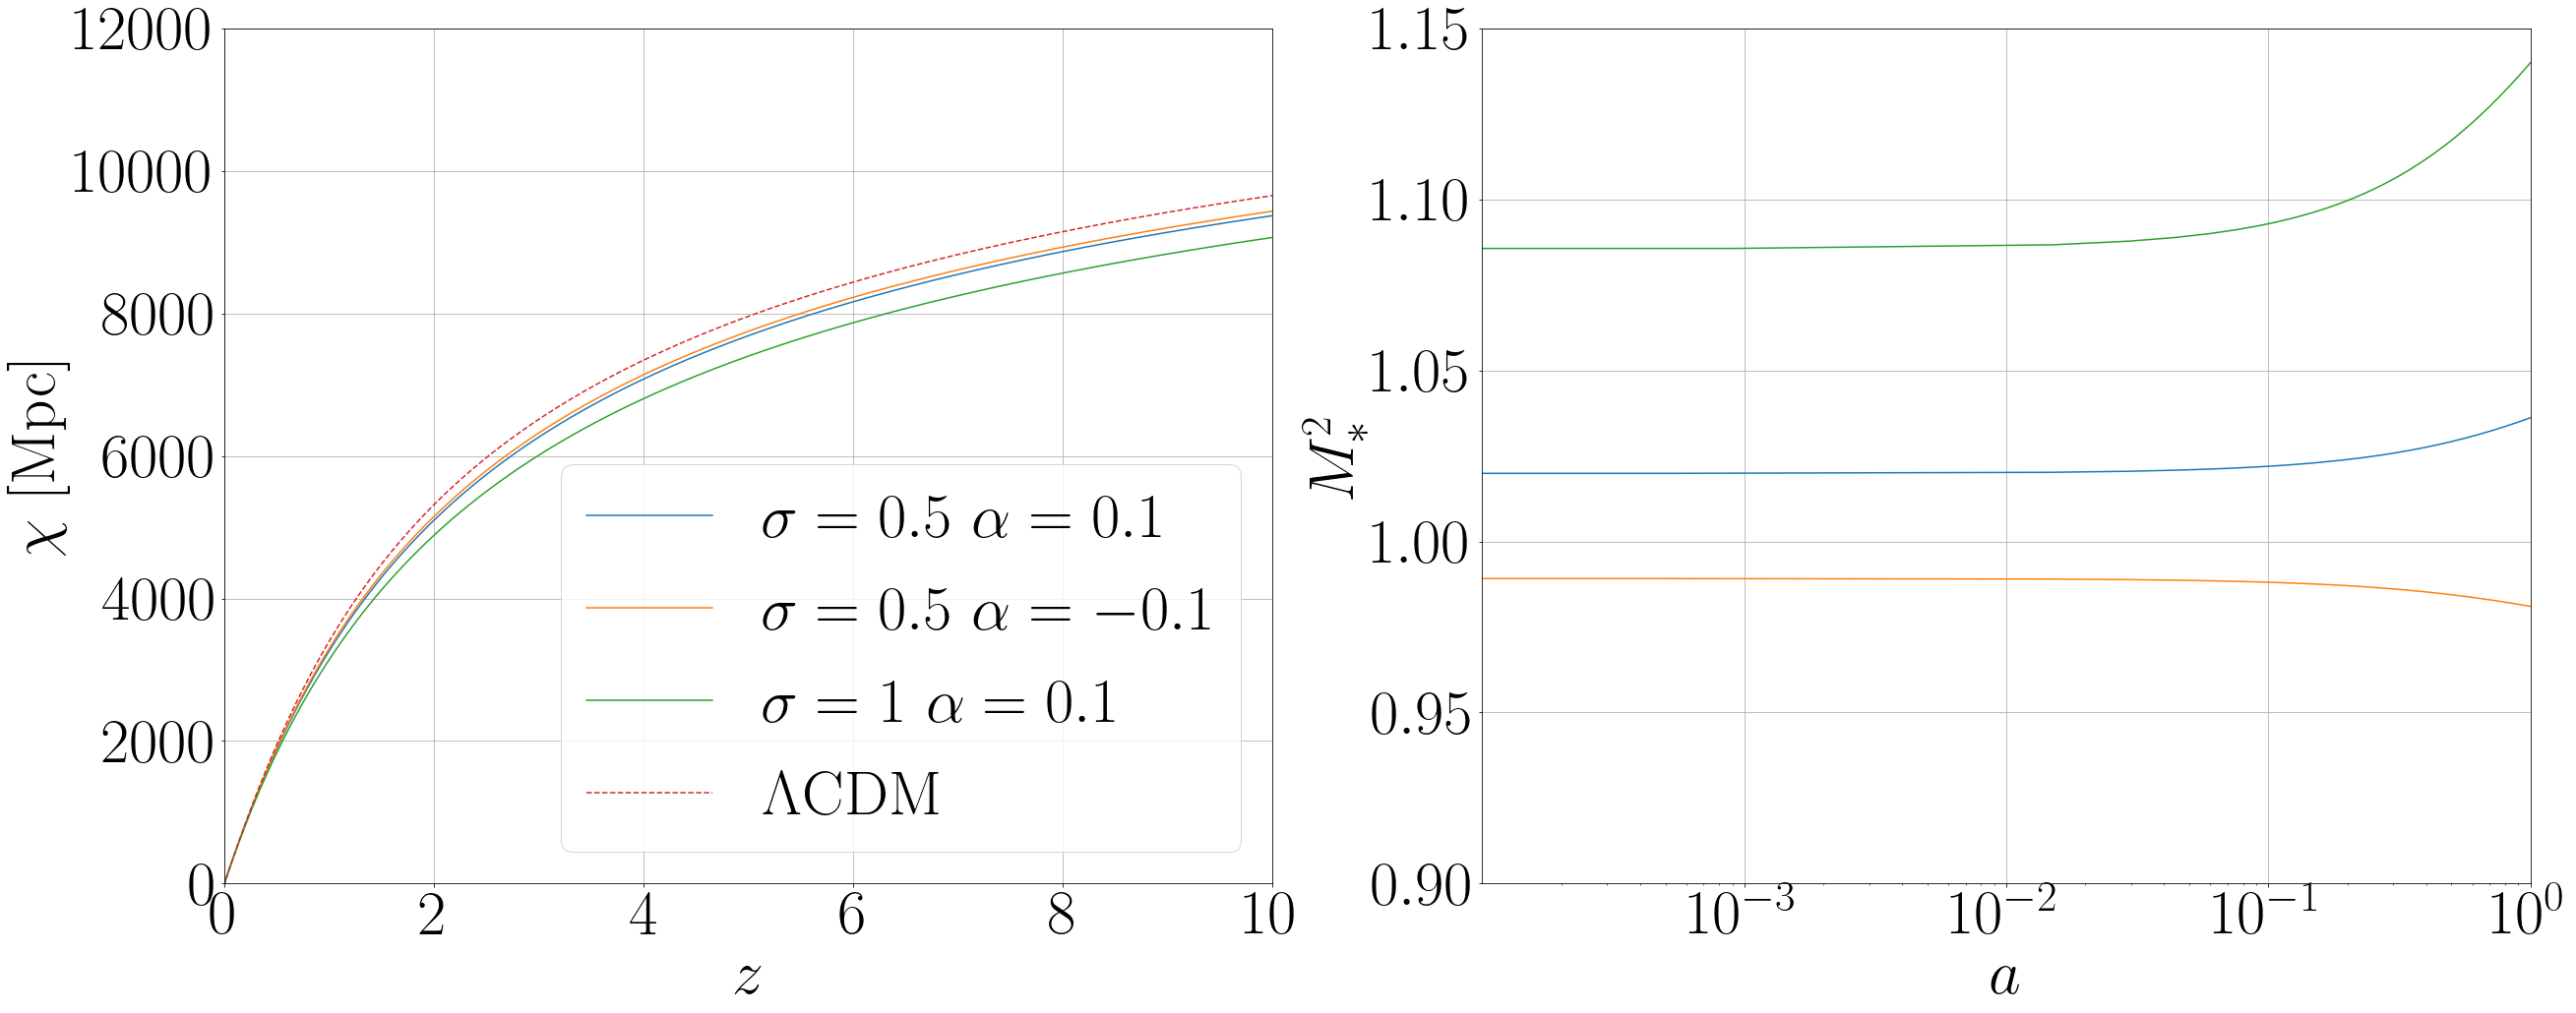

In [64]:
text_size=64
fig_size_x=42
fig_size_y=16

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

f,axarr = plt.subplots(1,2,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w')

X = np.array([0.5,1])
Y = np.array([AgeFe,AgeFe3])
c = ["yellow","blue","red","blue"]

bkg_fe2

axarr[0].plot(bkg_fe['z'],bkg_fe['comov. dist.'],label="$\sigma=0.5$ $\\alpha=0.1$")
axarr[0].plot(bkg_fe2['z'],bkg_fe2['comov. dist.'],label="$\sigma=0.5$ $\\alpha=-0.1$")
axarr[0].plot(bkg_fe3['z'],bkg_fe3['comov. dist.'],label="$\sigma=1$ $\\alpha=0.1$")
axarr[0].plot(bkg_lcdm['z'],bkg_lcdm['comov. dist.'], "--",label="$\Lambda$CDM")

#plt.xlim(-10,0)
axarr[0].set_ylim(0,12000)
axarr[0].set_xlim(0,10)
axarr[0].legend()
#plt.title("$k=0.1$")
axarr[0].set_ylabel("$\chi$ $[$Mpc$]$")
axarr[0].set_xlabel("$z$")

axarr[0].grid(True)

axarr[1].semilogx(1/bkg_fe['z']-1,bkg_fe['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=0.1$')
axarr[1].semilogx(1/bkg_fe2['z']-1,bkg_fe2['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=-0.1$')
axarr[1].semilogx(1/bkg_fe3['z']-1,bkg_fe3['M*^2_smg'],label='$\\sigma=1 \,\,\,\\alpha=0.1$')
#plt.xlim(-10,0)
axarr[1].set_ylim(0.9,1.15)
axarr[1].set_xlim(1e-4,1)
#axarr[1].legend()
#plt.title("$k=0.1$")
axarr[1].set_ylabel("$M_*^2$")
axarr[1].set_xlabel("$a$")

axarr[1].grid(True)

customticks2=[1e-3,1e-2,1e-1,1]
axarr[1].set_xticks(customticks2)

#f.subplots_adjust(wspace=0)
#f.subplots_adjust(hspace=0)

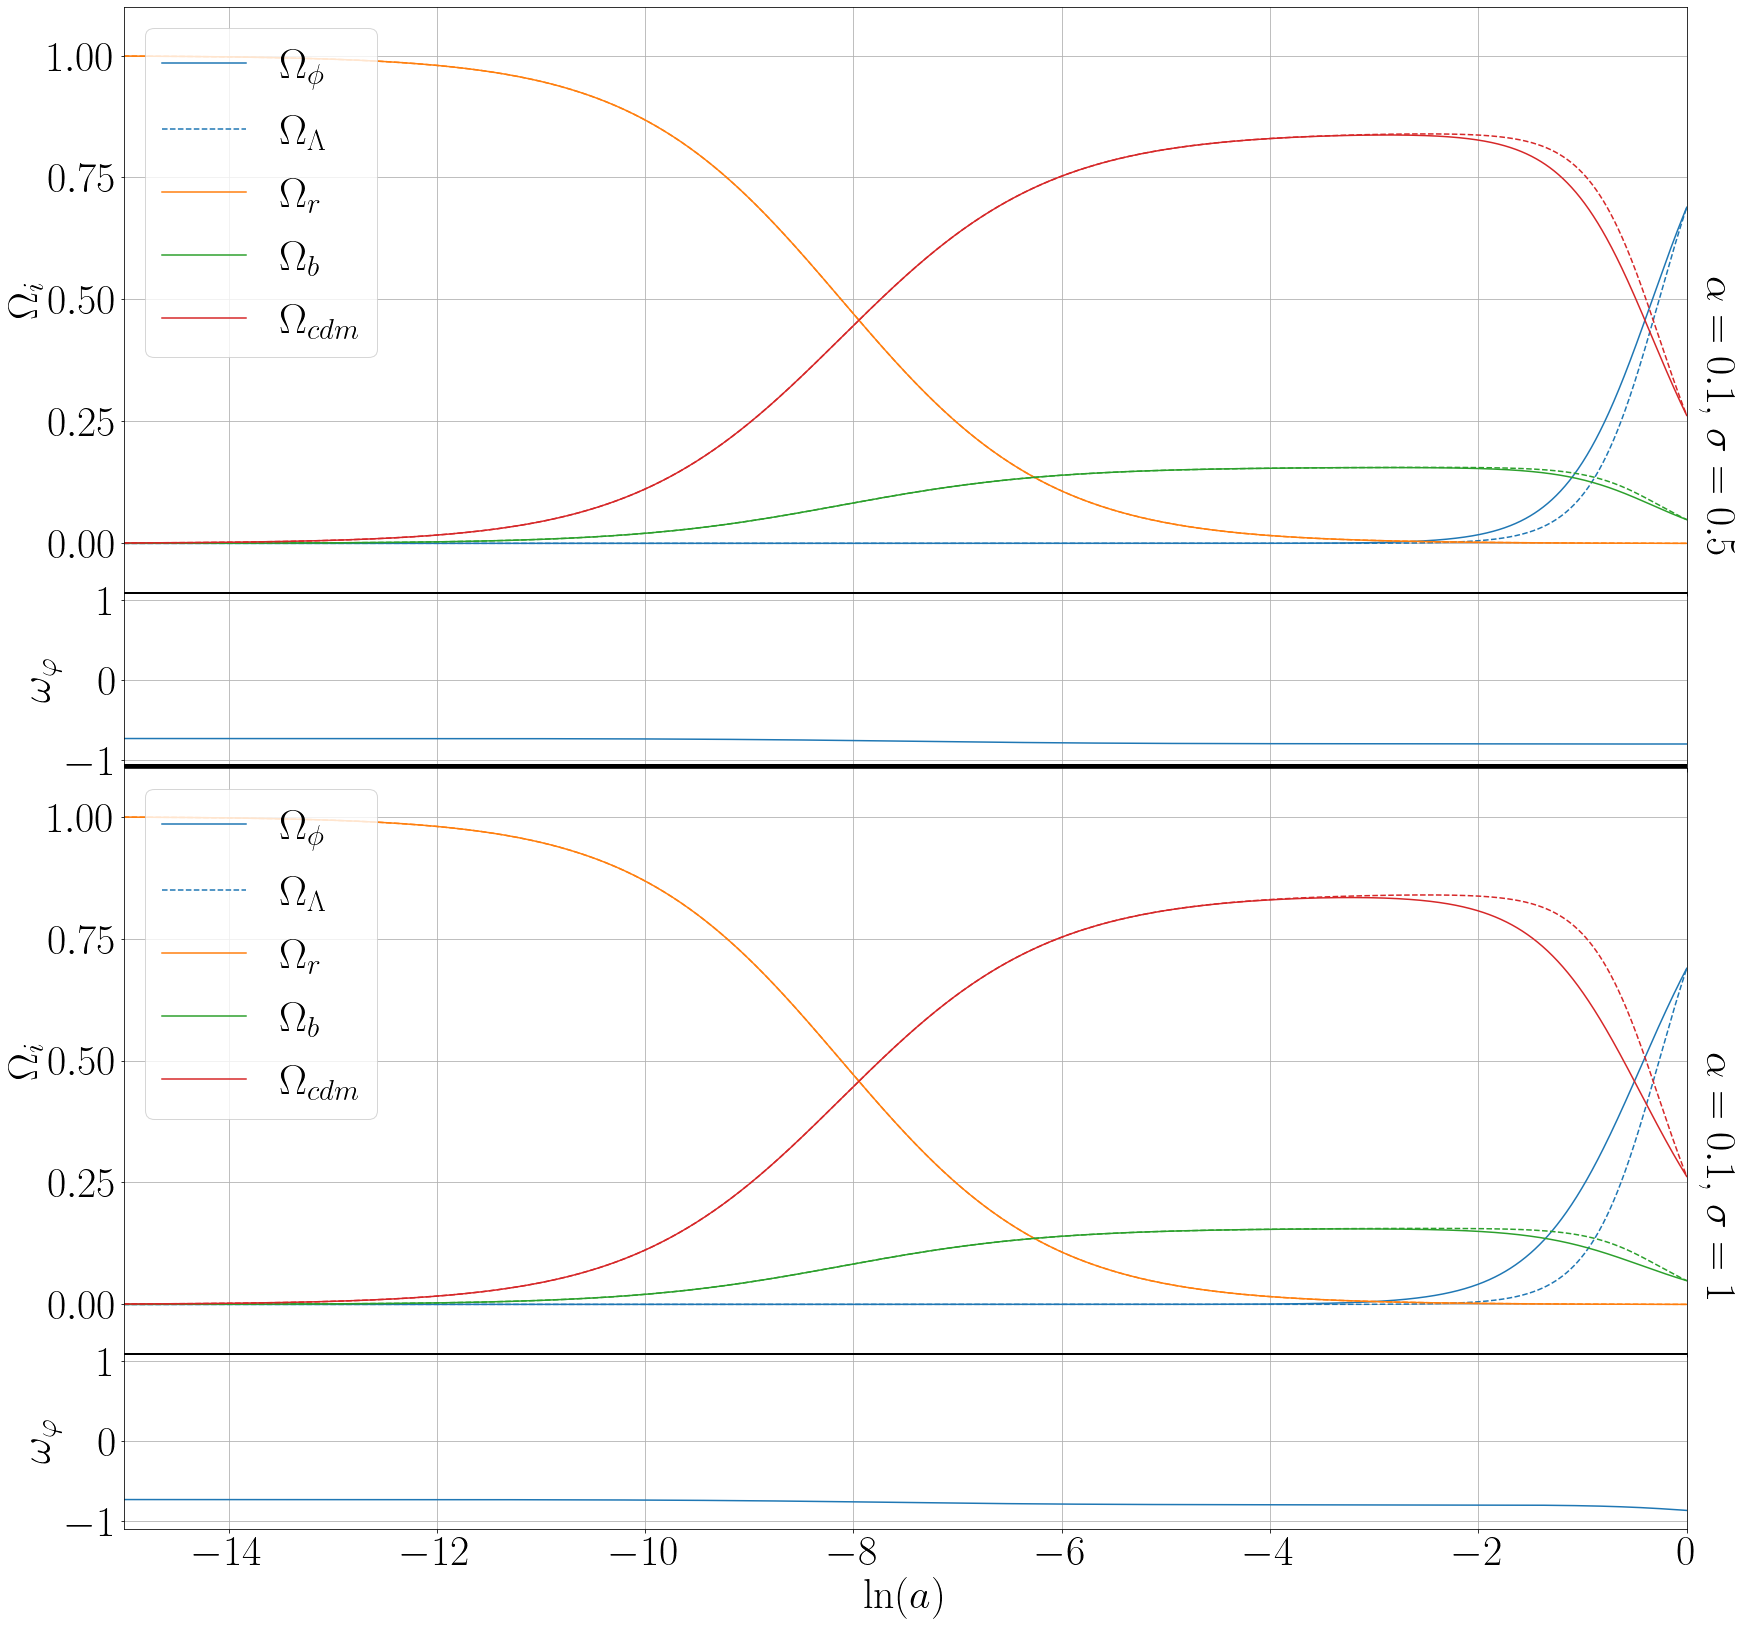

In [72]:
text_size=42
fig_size_x=28
fig_size_y=28

N_last = - 15

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

borders=[-15,0,-0.1,1.1]

f, (ax1, ax1_w, ax2, ax2_w) = plt.subplots(4, sharex=True, sharey=False ,figsize=(fig_size_x,fig_size_y),gridspec_kw = {'height_ratios':[1,0.3,1,0.3]})
p1=ax1.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)rho_smg']/bkg_fe['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_g']+bkg_fe['(.)rho_ur'])/bkg_fe['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_b'])/bkg_fe['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_cdm'])/bkg_fe['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)

ax1.set_ylabel("$\Omega_i$")
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.axis([N_last,0,-0.1,1.1])
ax1.set_xlim(-15,0)

p1_w=ax1_w.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)p_smg']/bkg_fe['(.)rho_smg'])
ax1_w.set_ylabel("$\omega_\\varphi$")
ax1_w.grid(True)
ax1_w.axhline(1.1, color="black", linewidth=4)
ax1_w.axhline(-1.1, color="black", linewidth=8)
ax1_w.axis([N_last,0,-1.1,1.1])

left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax1.text(1.02, 0.3*(bottom+top), '$\\alpha = 0.1$,  $\\sigma = 0.5$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax1.transAxes)

p1=ax2.plot(np.log(1/(1+bkg_fe3['z'])),bkg_fe3['(.)rho_smg']/bkg_fe3['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax2.plot(np.log(1/(1+bkg_fe3['z'])),(bkg_fe3['(.)rho_g']+bkg_fe3['(.)rho_ur'])/bkg_fe3['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax2.plot(np.log(1/(1+bkg_fe3['z'])),(bkg_fe3['(.)rho_b'])/bkg_fe3['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax2.plot(np.log(1/(1+bkg_fe3['z'])),(bkg_fe3['(.)rho_cdm'])/bkg_fe3['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
#ax2.set_xlabel("log($a$)")
ax2.set_ylabel("$\Omega_i$")
ax2.legend(loc='upper left')
ax2.grid(True)
ax2.axis([N_last,0,-0.1,1.1])

ax2.text(1.02, 0.3*(bottom+top), '$\\alpha = 0.1$,  $\\sigma = 1$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax2.transAxes)

p2_w=ax2_w.plot(np.log(1/(1+bkg_fe2['z'])),bkg_fe2['(.)p_smg']/bkg_fe2['(.)rho_smg'])
ax2_w.set_ylabel("$\omega_\\varphi$")
ax2_w.set_xlabel("ln($a$)")
ax2_w.axhline(1.1, color="black", linewidth=4)
ax2_w.grid(True)
ax2_w.axis([N_last,0,-1.1,1.1])

f.subplots_adjust(hspace=0)
f.figsize=(24,24)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.eps',bbox_inches='tight',format='eps',dpi=1000)
#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.pdf',bbox_inches='tight')

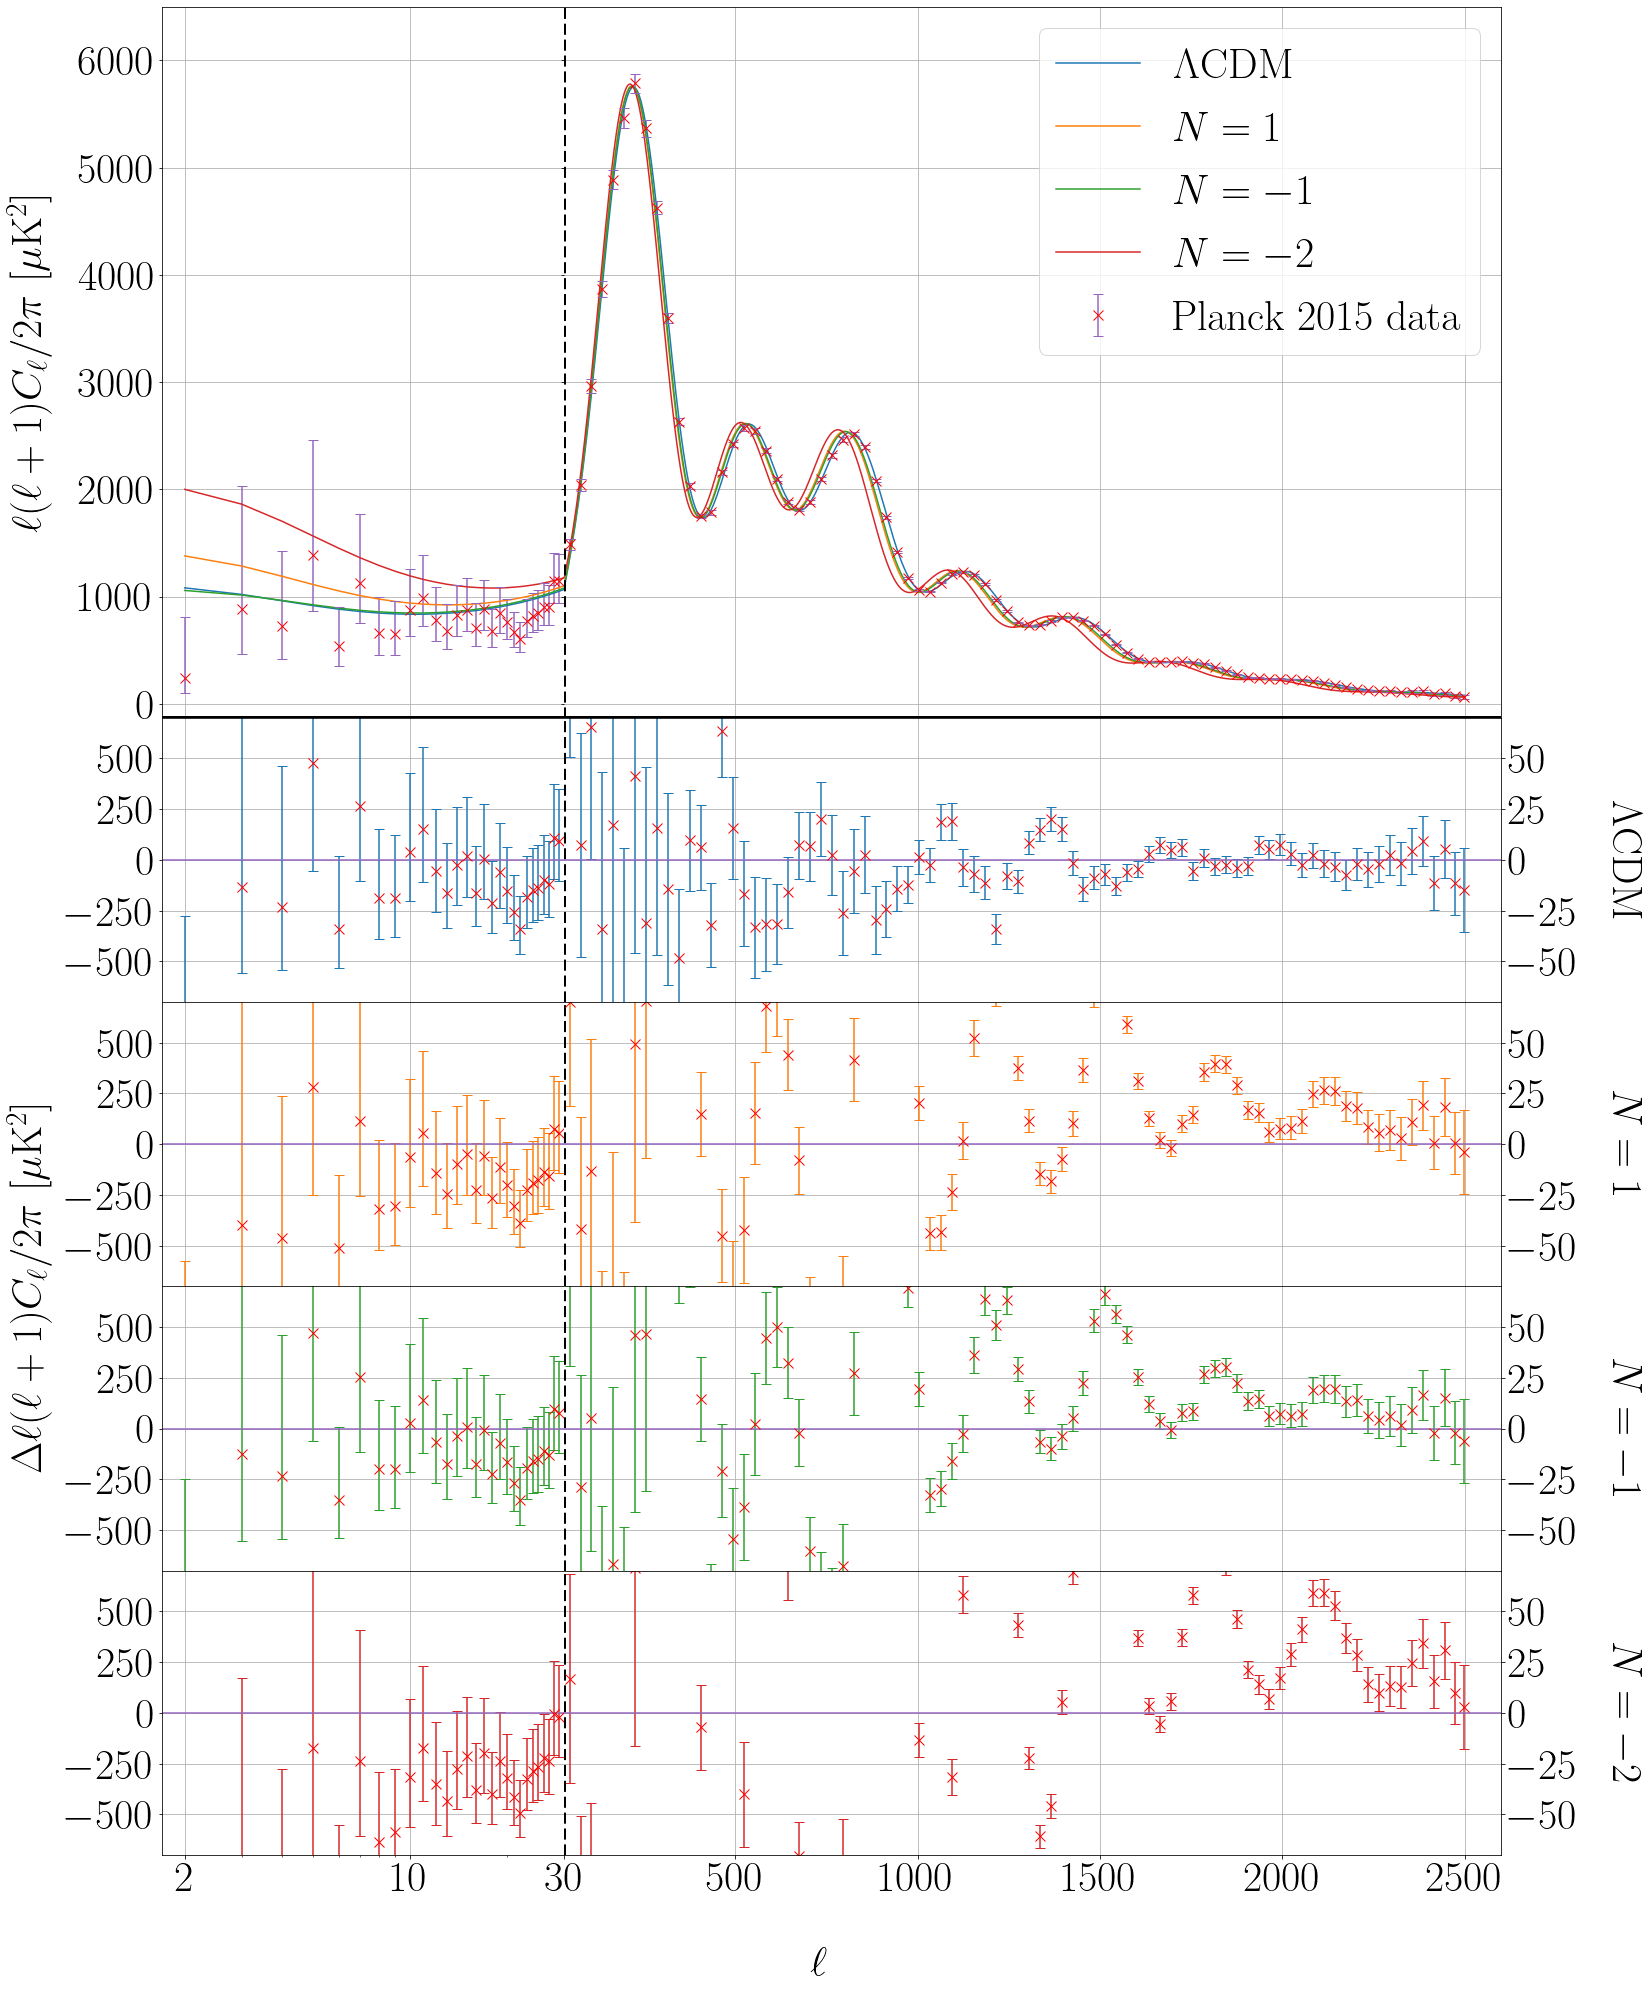

In [16]:
#T0=2.7255
text_size=42
fig_size_x=24
fig_size_y=14

T0=2.7255

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

filename = 'data/COM_PowerSpect_CMB-TT-hiL-binned_R2.02.txt'
data1=np.genfromtxt(filename, delimiter='', comments='#');

ELL = np.asarray(data1[:,0])
LMIN=np.asarray(data1[:,1]) 
LMAX=np.asarray(data1[:,2])
D_EE=np.asarray(data1[:,3])#muKcmb^2
ERR=np.asarray(data1[:,4])#muKcmb^2

filename = 'data/COM_PowerSpect_CMB-TT-loL-full_R2.02.txt'
data2=np.genfromtxt(filename, delimiter='', comments='#');

ELL2 = np.asarray(data2[:,0])
D_ELL2=np.asarray(data2[:,1])#muKcmb^2
ERRUP2=np.asarray(data2[:,2])#muKcmb^2
ERRDOWN2=np.asarray(data2[:,3])#muKcmb^2

text_size=26
fig_size_x=24
fig_size_y=34

f,axarr = plt.subplots(5,2,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'width_ratios':[0.3,0.7],'height_ratios':[1, 0.4,0.4,0.4,0.4]})

p1=axarr[0,1].plot(ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),label='$\Lambda$CDM')
color_lcdm=p1[0].get_color()
p2=axarr[0,1].plot(l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),label='$N=1$')
color1=p2[0].get_color()
p3=axarr[0,1].plot(l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),label='$N=-1$')
color2=p3[0].get_color()
p4=axarr[0,1].plot(l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),label='$N=-2$')
color3=p4[0].get_color()
p5=axarr[0,1].errorbar(ELL,D_EE,yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,label='Planck 2015 data')
color_error=p5[0].get_color()

axarr[0,0].set_xscale("log")

axarr[0,0].plot(ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),label='$\Lambda$CDM')
axarr[0,0].plot(l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),label='$N=1$')
axarr[0,0].plot(l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),label='$N=-1$')
axarr[0,0].plot(l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),label='$N=-2$')
axarr[0,0].errorbar(ELL2,D_ELL2,yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,label='Planck data')

asse_max_l=2600

axarr[0,0].set_xlim(1.7,30)
axarr[0,1].set_xlim(30,asse_max_l)

axarr[0,1].set_ylim(-130,6500)
axarr[0,0].set_ylim(-130,6500)

axarr[0,0].grid(True)
axarr[0,1].grid(True)

axarr[0,1].legend()

customticks2=[2,10,30]
axarr[0,0].set_xticks(customticks2)
axarr[0,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

l_m=30
axarr[0,1].axvline(l_m, color="black", linestyle="--", linewidth=3)

# hide the spines between ax and ax2
axarr[0,0].spines['right'].set_visible(False)
axarr[0,1].spines['left'].set_visible(False)
axarr[0,1].axes.yaxis.set_ticklabels([])
axarr[0,1].yaxis.tick_left()
axarr[0,1].tick_params(labelright='off')

#f.text(0.5, 0.07, '$\ell$', va='center')
#axarr[0,0].set_ylabel("$\ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")
















def rel_diff(x1, y1, x2, y2, N=3e3, spacing = 'linear', epsilon=1e-5, ref = 0):
   """ NO(Relative)NO - THIS IS THE difference between data vectors (MODIFIED)

   Args:
       x1,y1,x2,y2 (np array): data to interpolate.
       N (int): number of points on which to interpolate.
       spacing (str): how to populate the interpolation (log or linear).
       epsilon (float): cut the interval to avoid interpolation problems.
       ref (int): if 0 the rel diff is calculated using N points with linear or log spacing, if 1 (2) the rel diff is calculated only at the points of model 1 (2).

   Returns:
       [x,y]: arrays with the relative difference.

   """

   diff = []

   #don't compute it many times, slow for long arrays
   xmin = (1.+0*epsilon)*max(min(x1),min(x2))
   xmax = (1.-0*epsilon)*min(max(x1),max(x2))

   data1 = interpolate.interp1d(x1,y1)
   data2 = interpolate.interp1d(x2,y2)

   if ref == 1:
       therange = [x for x in x1 if xmin<=x<=xmax]
   elif ref == 2:
       therange = [x for x in x2 if xmin<=x<=xmax]
   else:
       if spacing == 'linear':
           therange = np.linspace(xmin,xmax,N)
       else:
           therange = np.exp(np.linspace(np.log(xmin),np.log(xmax),N))

   #print therange
   for x in therange:
       diff.append((data1(x)-data2(x)))

   return [np.array(therange),np.array(diff)]

#?rel_diff






















limite_asse=700
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height




axarr[1,0].set_xscale("log")

customticks2=[2,10,30]
axarr[1,0].set_xticks(customticks2)
axarr[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
customticks=[500,250,0,-250,-500]
axarr[1,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[1,1].set_yticks(customticks)

axarr[1,0].errorbar(rel_diff(ELL2, D_ELL2,ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,ll,factorl*lensed_cl_lcdm['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color_lcdm)

axarr[1,1].errorbar(rel_diff(ELL, D_EE,ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,ll,factorl*lensed_cl_lcdm['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color_lcdm)

axarr[1,0].set_xlim(1.7,30)
axarr[1,1].set_xlim(30,asse_max_l)

axarr[1,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[1,0].set_ylim(-limite_asse,limite_asse)

axarr[1,0].grid(True)
axarr[1,1].grid(True)

#plt.legend()

l_m=30
axarr[1,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[1,0].axhline(0, color=color_error, linestyle="-")
axarr[1,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[1,0].spines['right'].set_visible(False)
axarr[1,1].spines['left'].set_visible(False)
#axarr[1,1].axes.yaxis.set_ticklabels([])
axarr[1,0].yaxis.tick_left()
axarr[1,1].yaxis.tick_right()
axarr[1,0].tick_params(labelright='off')

#axarr[1,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")






axarr[2,0].set_xscale("log")

customticks2=[2,10,30]
axarr[2,0].set_xticks(customticks2)
axarr[2,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
customticks=[500,250,0,-250,-500]
axarr[2,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[2,1].set_yticks(customticks)

axarr[2,0].errorbar(rel_diff(ELL2, D_ELL2,l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,l,factor*lensed_cl['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color1)

axarr[2,1].errorbar(rel_diff(ELL, D_EE,l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,l,factor*lensed_cl['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color1)


axarr[2,0].set_xlim(1.7,30)
axarr[2,1].set_xlim(30,asse_max_l)

axarr[2,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[2,0].set_ylim(-limite_asse,limite_asse)

axarr[2,0].grid(True)
axarr[2,1].grid(True)

#plt.legend()

l_m=30
axarr[2,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[2,0].axhline(0, color=color_error, linestyle="-")
axarr[2,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[2,0].spines['right'].set_visible(False)
axarr[2,1].spines['left'].set_visible(False)
#axarr[2,1].axes.yaxis.set_ticklabels([])
axarr[2,0].yaxis.tick_left()
axarr[2,1].yaxis.tick_right()
axarr[2,0].tick_params(labelright='off')

#axarr[2,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")



axarr[3,0].set_xscale("log")

customticks2=[2,10,30]
axarr[3,0].set_xticks(customticks2)
axarr[3,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
customticks=[500,250,0,-250,-500]
axarr[3,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[3,1].set_yticks(customticks)

axarr[3,0].errorbar(rel_diff(ELL2, D_ELL2,l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,l,factor*lensed_cl2['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color2)
axarr[3,1].errorbar(rel_diff(ELL, D_EE,l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,l,factor*lensed_cl2['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color2)



axarr[3,0].set_xlim(1.7,30)
axarr[3,1].set_xlim(30,asse_max_l)

axarr[3,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[3,0].set_ylim(-limite_asse,limite_asse)

axarr[3,0].grid(True)
axarr[3,1].grid(True)

#plt.legend()

l_m=30
axarr[3,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[3,0].axhline(0, color=color_error, linestyle="-")
axarr[3,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[3,0].spines['right'].set_visible(False)
axarr[3,1].spines['left'].set_visible(False)
#axarr[3,1].axes.yaxis.set_ticklabels([])
axarr[3,0].yaxis.tick_left()
axarr[3,1].yaxis.tick_right()
axarr[3,0].tick_params(labelright='off')

#axarr[3,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")


axarr[4,0].set_xscale("log")

customticks=[500,250,0,-250,-500]
axarr[4,0].set_yticks(customticks)
customticks=[50,25,0,-25,-50]
axarr[4,1].set_yticks(customticks)

axarr[4,0].errorbar(rel_diff(ELL2, D_ELL2,l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL2, D_ELL2,l,factor*lensed_cl3['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color3)
axarr[4,1].errorbar(rel_diff(ELL, D_EE,l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),ref=1)[0],rel_diff(ELL, D_EE,l,factor*lensed_cl3['tt'][2:]*2.7255*2.7255/pow(10,-12),ref=1)[1],yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,color=color3)



axarr[4,0].set_xlim(1.7,30)
axarr[4,1].set_xlim(30,asse_max_l)

axarr[4,1].set_ylim(-limite_asse/10,limite_asse/10)
axarr[4,0].set_ylim(-limite_asse,limite_asse)

axarr[4,0].grid(True)
axarr[4,1].grid(True)

#plt.legend()

l_m=30
axarr[4,1].axvline(l_m, color="black", linestyle="--", linewidth=3)
axarr[4,0].axhline(0, color=color_error, linestyle="-")
axarr[4,1].axhline(0, color=color_error, linestyle="-")

# hide the spines between ax and ax2
axarr[4,0].spines['right'].set_visible(False)
axarr[4,1].spines['left'].set_visible(False)
#axarr[4,1].axes.yaxis.set_ticklabels([])
axarr[4,0].yaxis.tick_left()
axarr[4,1].yaxis.tick_right()
axarr[4,0].tick_params(labelright='off')

f.text(0.5, 0.08, '$\ell$', va='center')
#axarr[4,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")

axarr[4,1].text(1.13, 0.5*(bottom+top), '$N=-2$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[4,1].transAxes)
axarr[2,1].text(1.13, 0.5*(bottom+top), '$N=-1$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[3,1].transAxes)
axarr[3,1].text(1.13, 0.5*(bottom+top), '$N=1$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[2,1].transAxes)
axarr[1,1].text(1.13, 0.5*(bottom+top), '$\Lambda$CDM', horizontalalignment='center', verticalalignment='center', rotation=270, transform=axarr[1,1].transAxes)


axarr[2,0].text(-0.33, 0.0*(bottom+top), "$\Delta \ell (\ell+1) C_\ell /2\pi$ $[\mu$K$^2]$", horizontalalignment='center', verticalalignment='center', rotation=90, transform=axarr[2,0].transAxes)
axarr[0,0].text(-0.33, 0.5*(bottom+top), "$\ell (\ell+1) C_\ell /2\pi$ $[\mu$K$^2]$", horizontalalignment='center', verticalalignment='center', rotation=90, transform=axarr[0,0].transAxes)

axarr[0,0].axhline(-130, color="black", linewidth=4)
axarr[0,1].axhline(-130, color="black", linewidth=4)





f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

customticks2=[2,10,30]
axarr[4,0].set_xticks(customticks2)
axarr[4,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34191/3519125529.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axarr[0].set_ylim(0,7e5)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34191/3519125529.py:29: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(k,(PK-PK_lcdm)/PK_lcdm)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34191/3519125529.py:31: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(k,(PK2-PK_lcdm)/PK_lcdm)
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34191/3519125529.py:33: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(k,(PK3-PK_lcdm)/PK_lcdm)


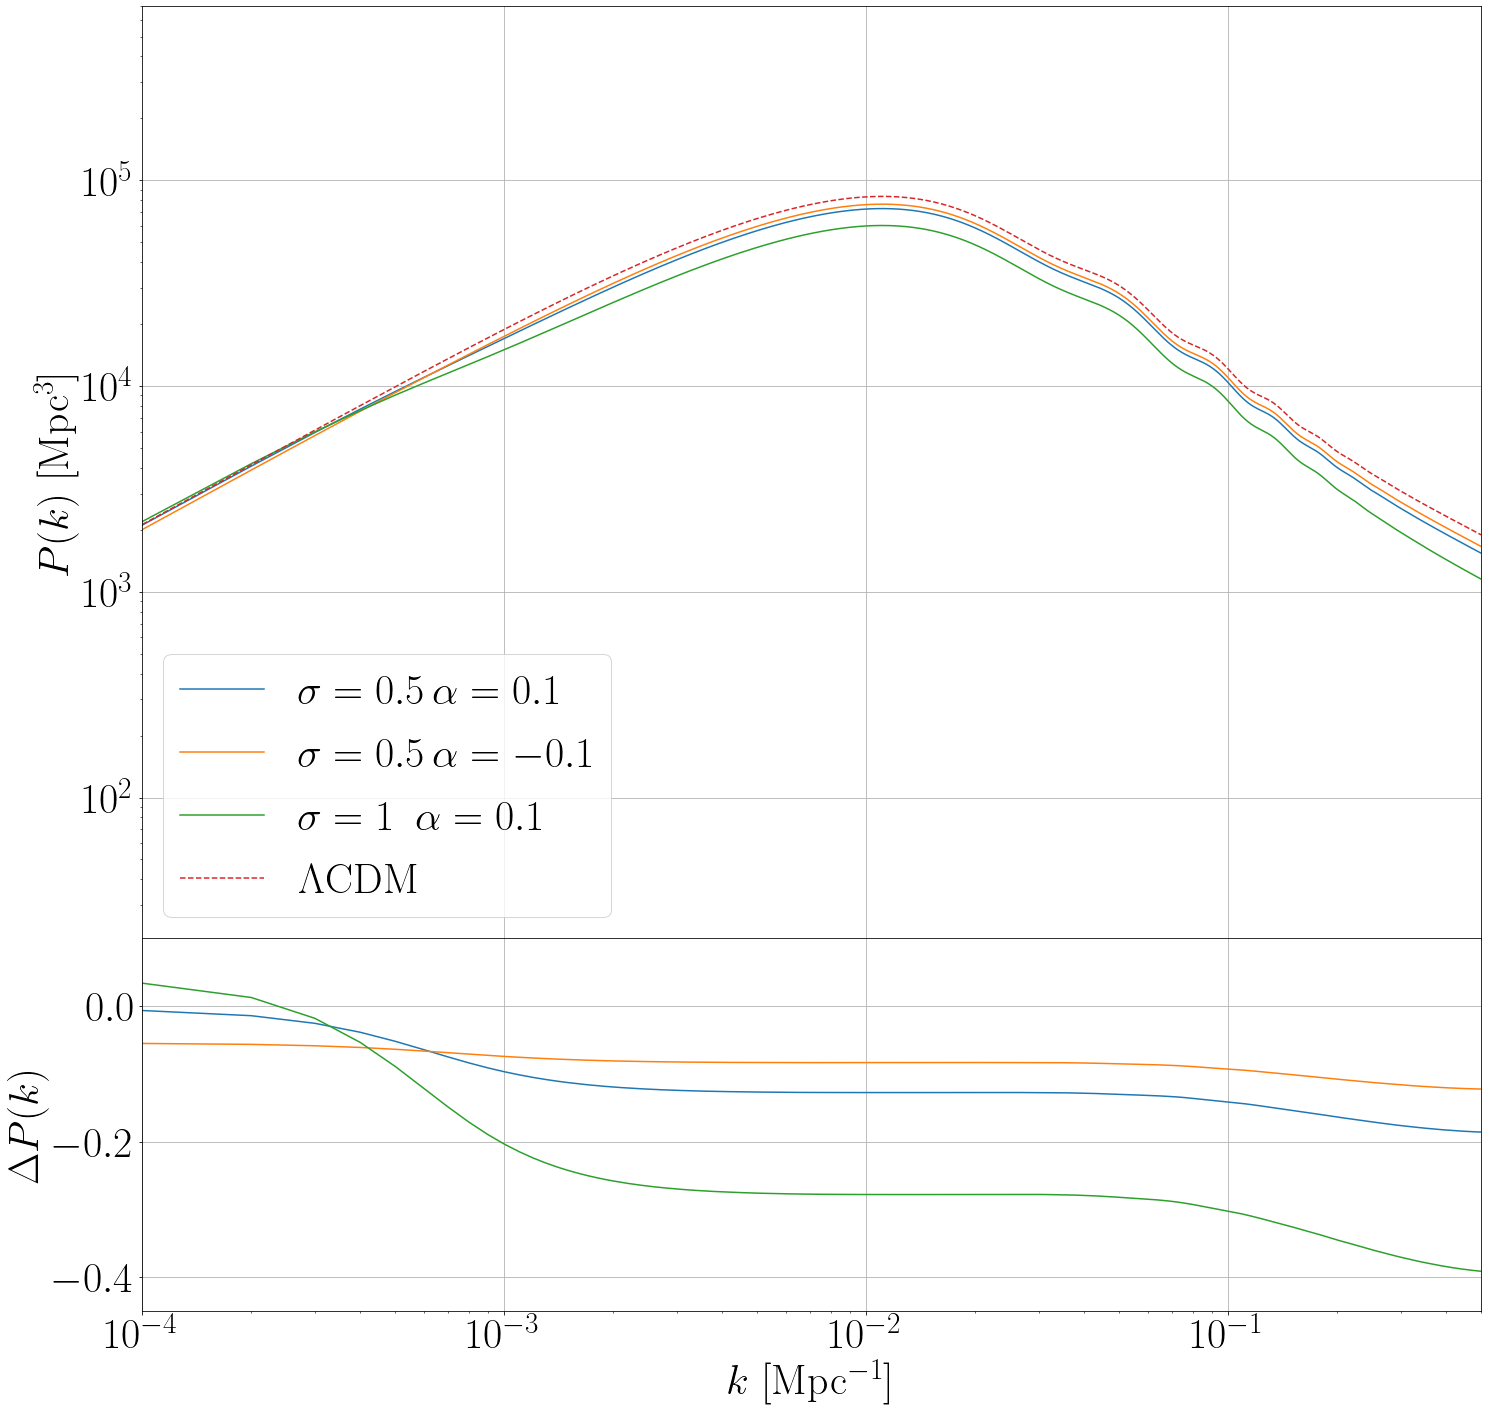

In [17]:
text_size=42
fig_size_x=24
fig_size_y=24

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)


f,axarr = plt.subplots(2,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'height_ratios':[1, 0.4]})

axarr[0].loglog(k,PK,label='$\\sigma=0.5 \,\\alpha=0.1$')
axarr[0].loglog(k,PK2,label='$\\sigma=0.5 \,\\alpha=-0.1$')
axarr[0].loglog(k,PK3,label='$\\sigma=1 \,\,\,\\alpha=0.1$')
axarr[0].loglog(k,PK_lcdm,'--',label='$\Lambda$CDM')
#plt.xlim(-10,0)
axarr[0].set_ylim(0,7e5)
axarr[0].set_xlim(1e-4,0.5)
axarr[0].legend()
#plt.title("$k=0.1$")
axarr[0].set_ylabel("$P(k)$ [Mpc$^{3}$]")
axarr[0].set_xlabel("$k$")

axarr[0].grid(True)

axarr[1].semilogx(k,(PK-PK_lcdm)/PK_lcdm)

axarr[1].semilogx(k,(PK2-PK_lcdm)/PK_lcdm)

axarr[1].semilogx(k,(PK3-PK_lcdm)/PK_lcdm)

axarr[1].grid(True)

axarr[1].set_ylabel("$\\Delta P(k)$")
axarr[1].set_xlabel("$k$ [Mpc$^{-1}$]")

axarr[1].set_xlim(1e-4,0.5)
axarr[1].set_ylim(-0.45,0.1)

customticks2=[1e-3,1e-2,1e-1]
axarr[0].set_xticks(customticks2)

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)

In [41]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os

from classy import Class


params_lcdm = {
    'output':'mPk',
    'P_k_max_h/Mpc':10,
    #'lensing':'y',
    'write background':'y',
    'input_verbose':10,
    'background_verbose':10,
    #'Omega_b' : 0.0481185,
    #'Omega_cdm': 0.2590835,
    'omega_b':0.02225,
    'omega_cdm':0.1198,
    'h':0.68,
    'A_s':2.085e-9,
    'n_s':0.9645
}

cosmo = Class()

cosmo.set(params_lcdm)
cosmo.compute()

bkg_lcdm=cosmo.get_background()
print("LCDM: " + str(cosmo.age()))

PK_lcdm=np.zeros(60000)
for i in range (0,59999):
    PK_lcdm[i]=cosmo.pk(k[i],0)

prtt_lcdm=cosmo.get_perturbations()
#print(prtt.viewkeys())
#prt_lcdm=prtt_lcdm['scalar']
#prt_lcdm0=prt_lcdm[0]
#prt_lcdm1=prt_lcdm[1]
#print(prt[0].viewkeys())

#raw_cl_lcdm = cosmo.raw_cl(l_max_scalars)
#lensed_cl_lcdm = cosmo.lensed_cl(2500)

print(cosmo.sigma8())

cosmo.struct_cleanup()
cosmo.empty()

LCDM: 13.765658970370236
0.8214479600086554


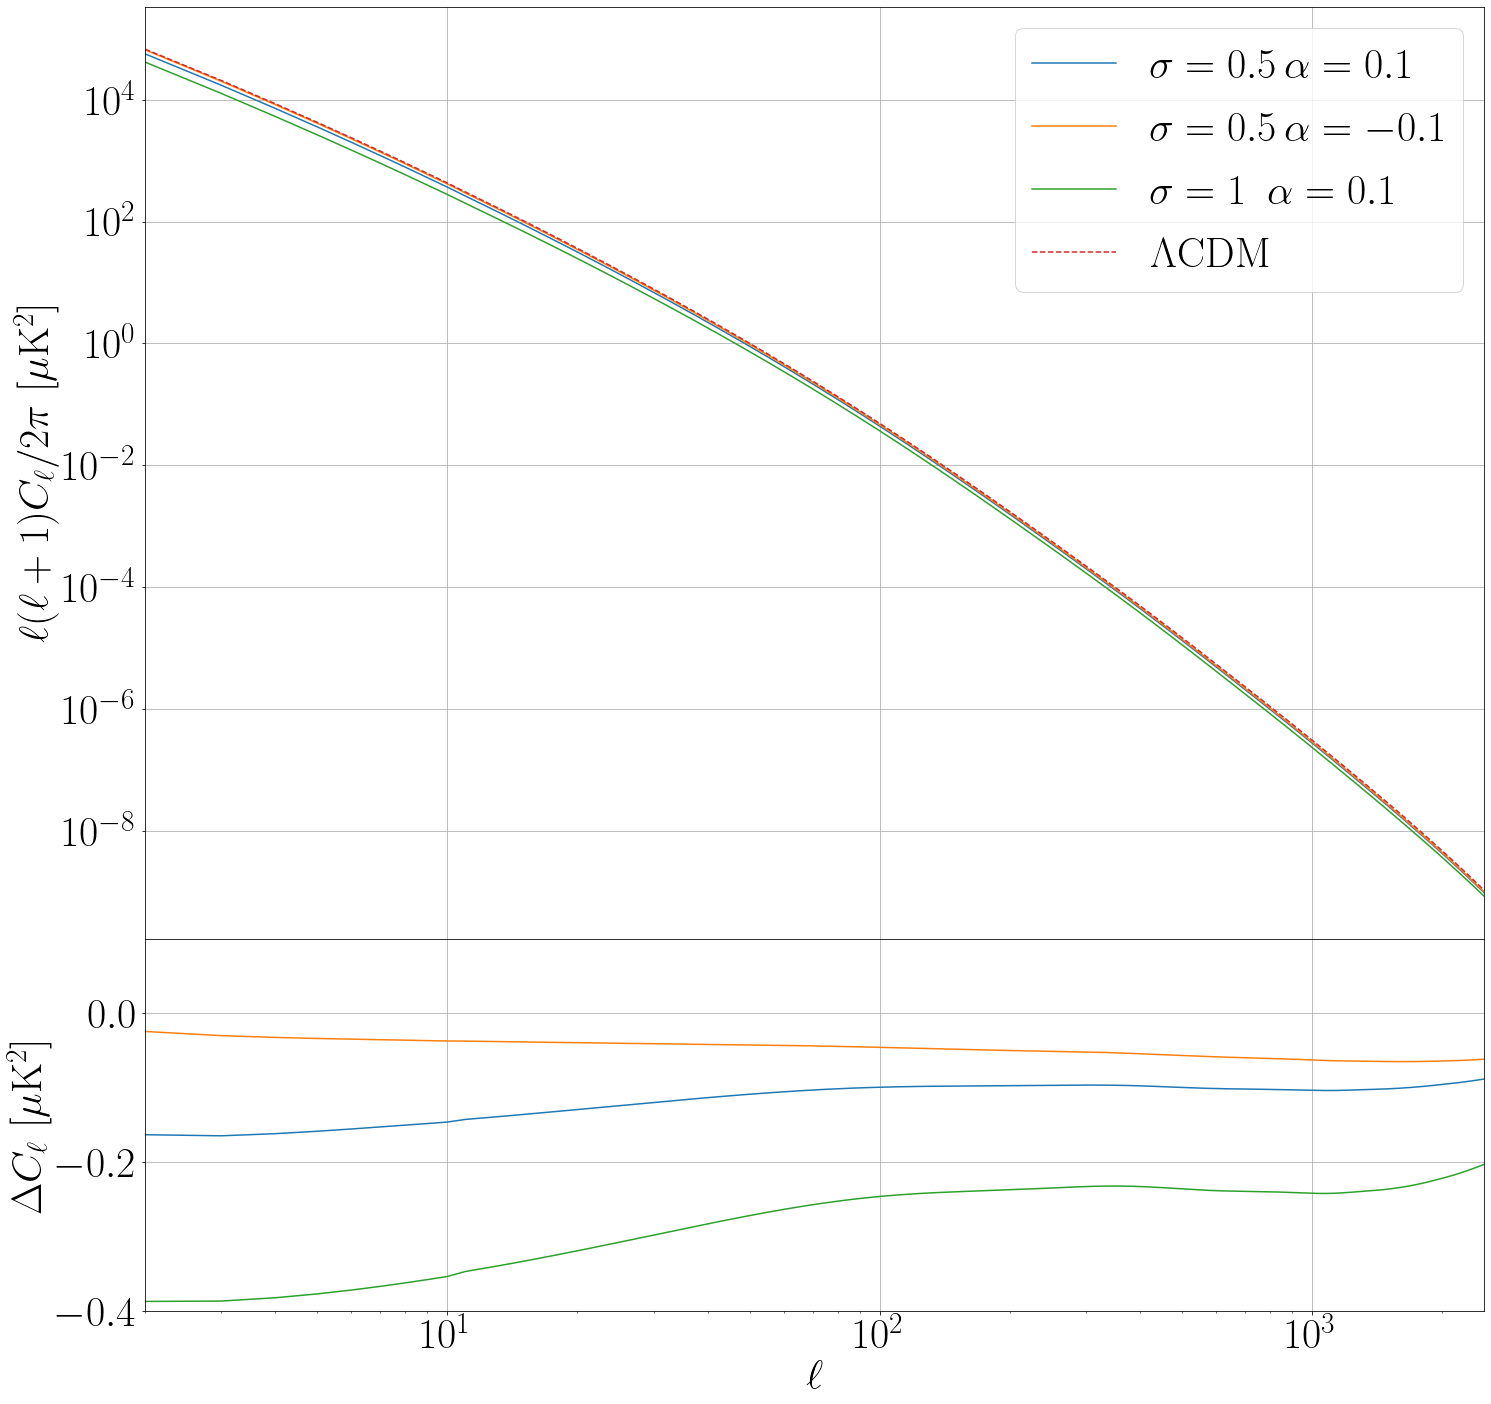

In [43]:
text_size=42
fig_size_x=24
fig_size_y=24

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)


f,axarr = plt.subplots(2,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'height_ratios':[1, 0.4]})

axarr[0].loglog(l,factor*lensed_cl['pp'][2:]*T0*T0/pow(10,-12),label='$\\sigma=0.5 \,\\alpha=0.1$')
axarr[0].loglog(l,factor*lensed_cl2['pp'][2:]*T0*T0/pow(10,-12),label='$\\sigma=0.5 \,\\alpha=-0.1$')
axarr[0].loglog(l,factor*lensed_cl3['pp'][2:]*T0*T0/pow(10,-12),label='$\\sigma=1 \,\,\,\\alpha=0.1$')
axarr[0].loglog(ll,factor*lensed_cl_lcdm['pp'][2:]*T0*T0/pow(10,-12),'--',label='$\Lambda$CDM')
#plt.xlim(-10,0)
#axarr[0].set_ylim(0,7e5)
axarr[0].set_xlim(2,2500)
axarr[0].legend()
#plt.title("$k=0.1$")
axarr[0].set_ylabel("$\ell (\ell+1) C_\ell /2\pi$ $[\mu$K$^2]$")
axarr[0].set_xlabel("$\ell$")

axarr[0].grid(True)

axarr[1].semilogx(l,(lensed_cl['pp'][2:]-lensed_cl_lcdm['pp'][2:])/lensed_cl_lcdm['pp'][2:])

axarr[1].semilogx(l,(lensed_cl2['pp'][2:]-lensed_cl_lcdm['pp'][2:])/lensed_cl_lcdm['pp'][2:])

axarr[1].semilogx(l,(lensed_cl3['pp'][2:]-lensed_cl_lcdm['pp'][2:])/lensed_cl_lcdm['pp'][2:])

axarr[1].grid(True)

axarr[1].set_ylabel("$\Delta C_\ell$ $[\mu$K$^2]$")
axarr[1].set_xlabel("$\ell$")

axarr[1].set_xlim(2,2500)
axarr[1].set_ylim(-0.4,0.1)

#customticks2=[1e-3,1e-2,1e-1]
#axarr[0].set_xticks(customticks2)

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34191/267389178.py:15: RuntimeWarning: divide by zero encountered in true_divide
  axarr.semilogx(1/bkg_fe['z']-1,bkg_fe['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=0.1$')
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34191/267389178.py:16: RuntimeWarning: divide by zero encountered in true_divide
  axarr.semilogx(1/bkg_fe2['z']-1,bkg_fe2['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=-0.1$')
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34191/267389178.py:17: RuntimeWarning: divide by zero encountered in true_divide
  axarr.semilogx(1/bkg_fe3['z']-1,bkg_fe3['M*^2_smg'],label='$\\sigma=1 \,\,\,\\alpha=0.1$')


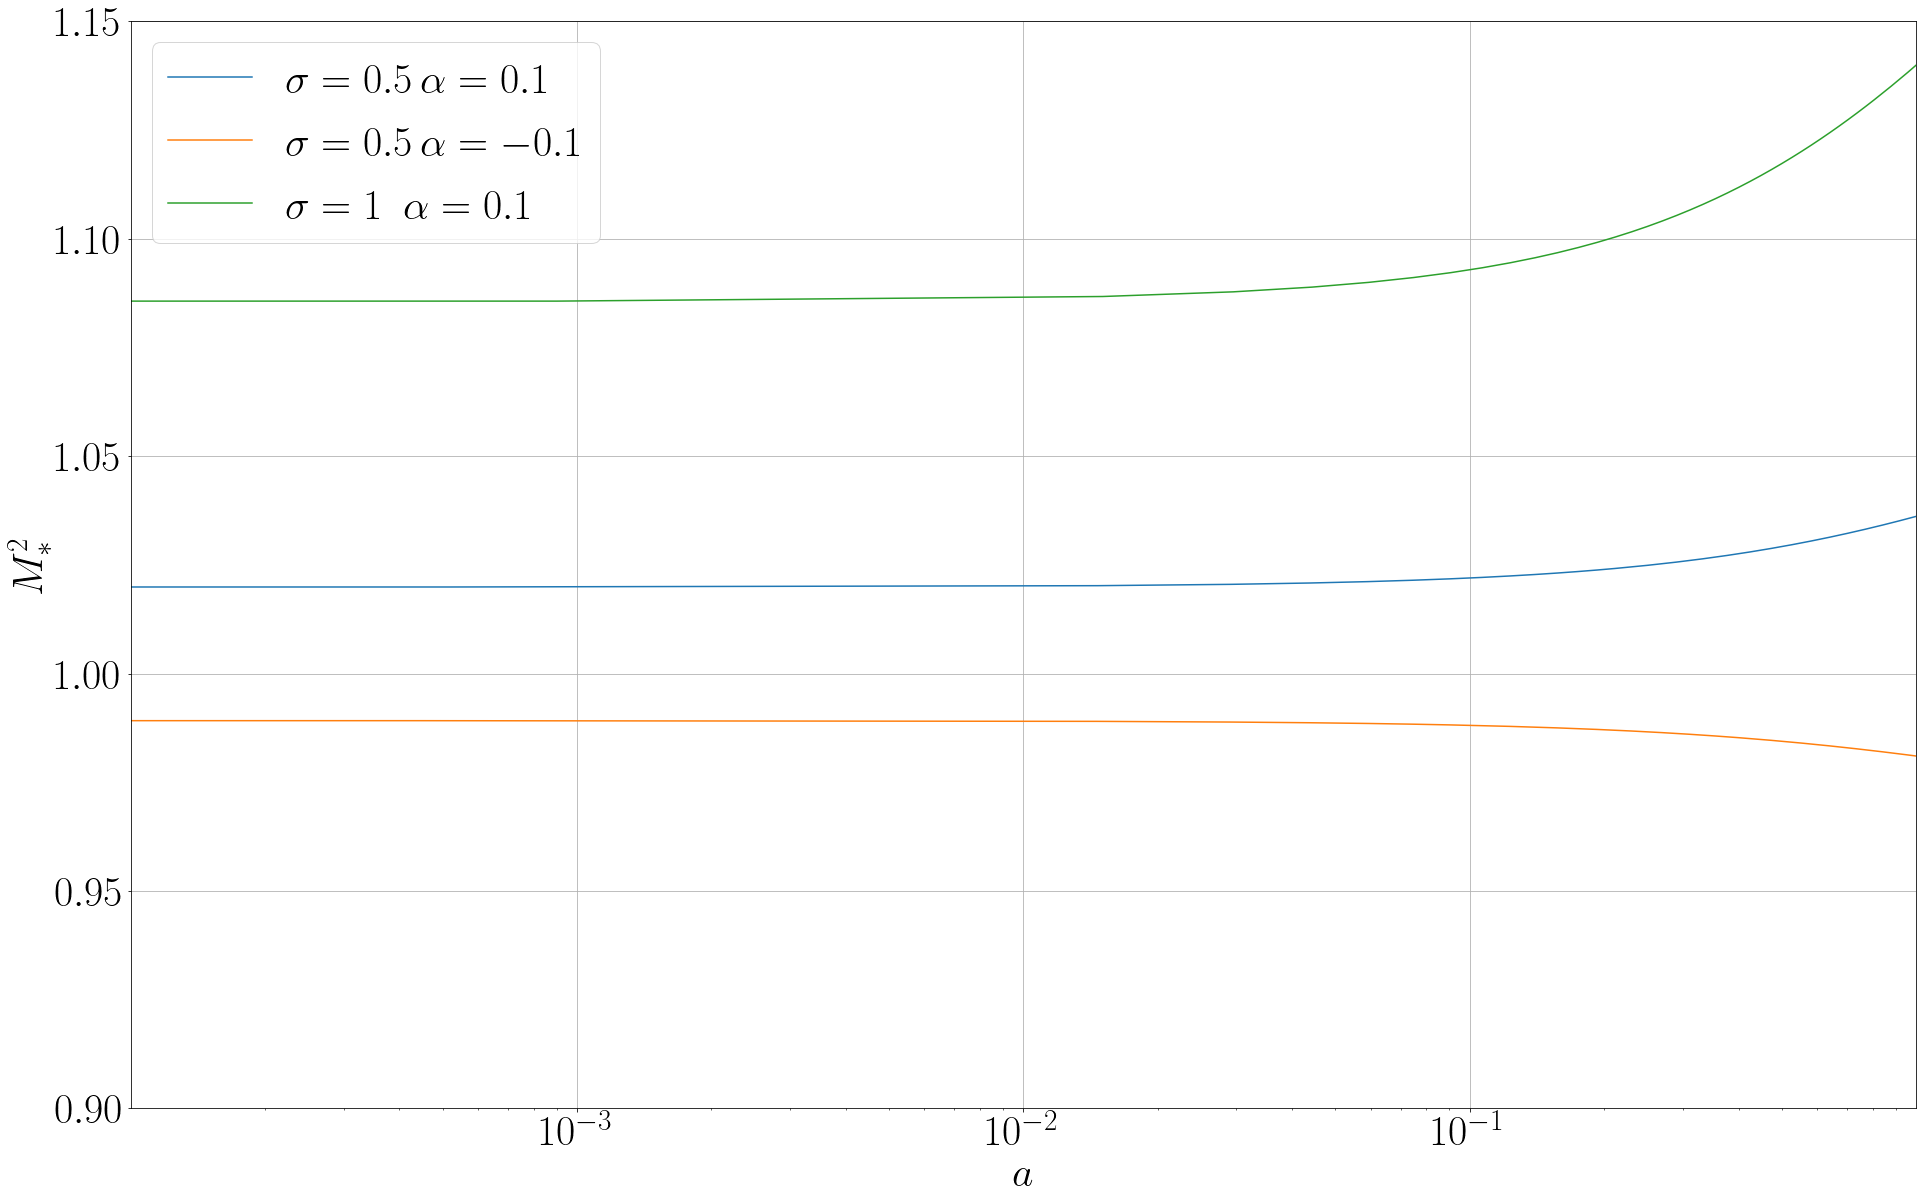

In [13]:
text_size=42
fig_size_x=32
fig_size_y=20

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)


f,axarr = plt.subplots(1,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w')

axarr.semilogx(1/bkg_fe['z']-1,bkg_fe['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=0.1$')
axarr.semilogx(1/bkg_fe2['z']-1,bkg_fe2['M*^2_smg'],label='$\\sigma=0.5 \,\\alpha=-0.1$')
axarr.semilogx(1/bkg_fe3['z']-1,bkg_fe3['M*^2_smg'],label='$\\sigma=1 \,\,\,\\alpha=0.1$')
#plt.xlim(-10,0)
axarr.set_ylim(0.9,1.15)
axarr.set_xlim(1e-4,1)
axarr.legend()
#plt.title("$k=0.1$")
axarr.set_ylabel("$M_*^2$")
axarr.set_xlabel("$a$")

axarr.grid(True)

customticks2=[1e-3,1e-2,1e-1]
axarr.set_xticks(customticks2)

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)

In [2]:
bkg_fe2

{'z': array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
        1.37816390e-02, 6.70033676e-03, 0.00000000e+00]),
 'proper time [Gyr]': array([7.51624445e-26, 7.62184017e-26, 7.72891940e-26, ...,
        1.32634453e+01, 1.33642761e+01, 1.34607369e+01]),
 'conf. time [Mpc]': array([4.60931915e-09, 4.64206096e-09, 4.67298378e-09, ...,
        1.39017131e+04, 1.39329444e+04, 1.39626178e+04]),
 'H [1/Mpc]': array([2.16967649e+22, 2.13961701e+22, 2.10997399e+22, ...,
        2.27223515e-04, 2.26253890e-04, 2.25342552e-04]),
 'H_prime': array([-9.41499215e+30, -9.22001336e+30, -9.02907247e+30, ...,
        -3.12188852e-08, -3.08749655e-08, -3.05515936e-08]),
 'comov. dist.': array([13962.61782878, 13962.61782878, 13962.61782878, ...,
           60.90469926,    29.67346208,     0.        ]),
 'ang.diam.dist.': array([1.39626178e-10, 1.40603562e-10, 1.41587786e-10, ...,
        6.00767433e+01, 2.94759632e+01, 0.00000000e+00]),
 'lum. dist.': array([1.39626178e+18, 1.38655589e+18, 1.3

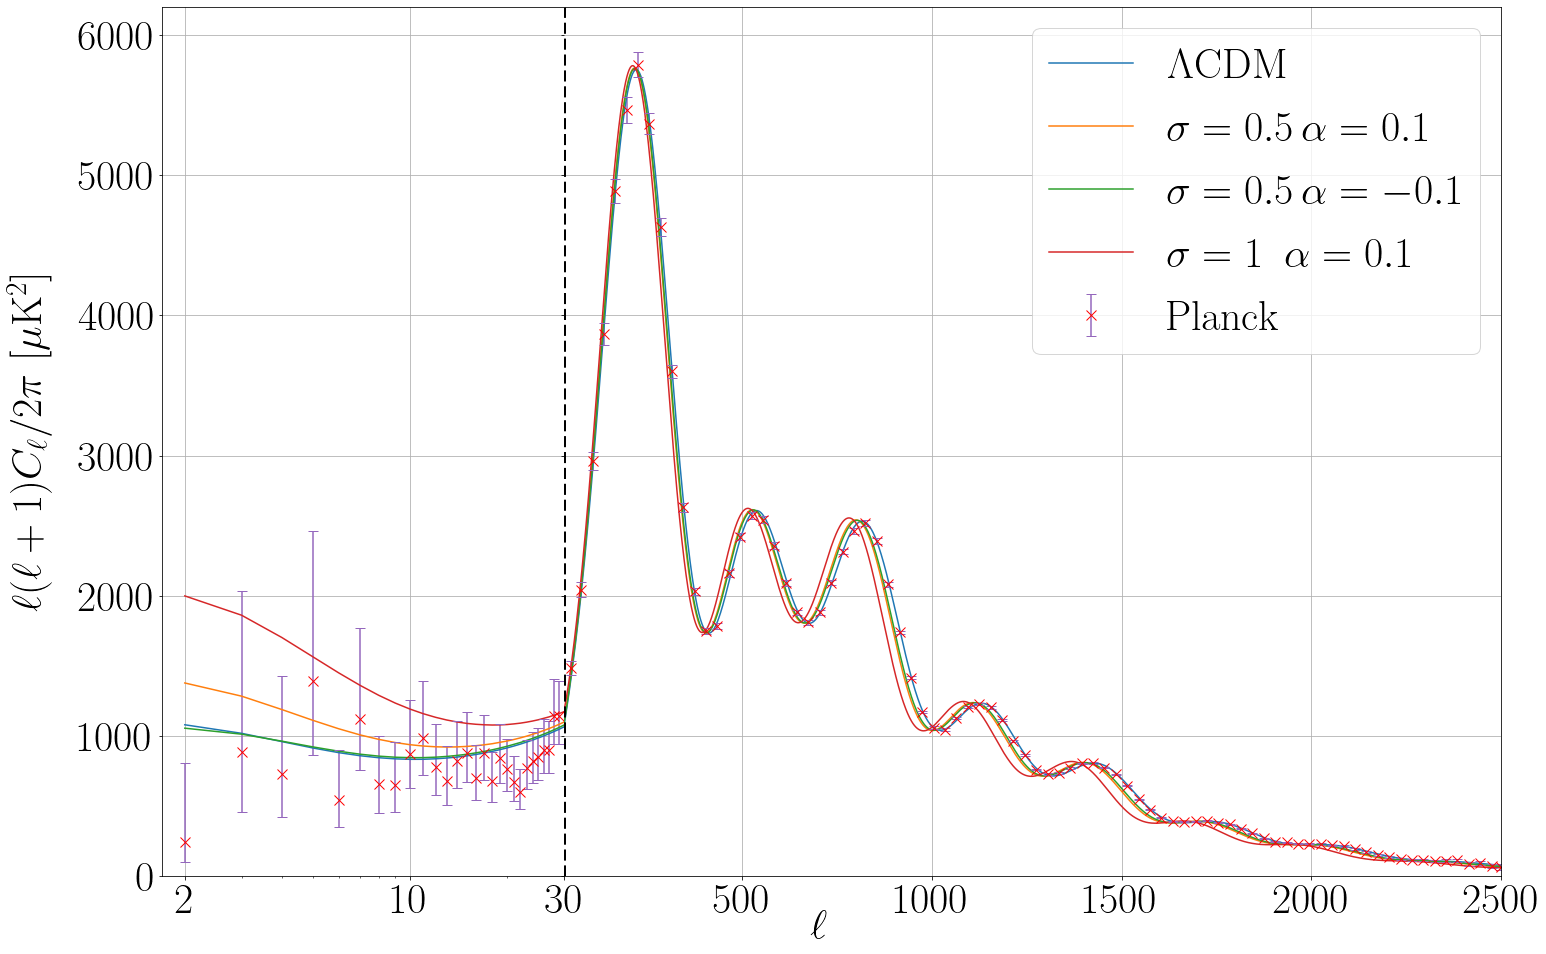

In [30]:
#T0=2.7255
text_size=42
fig_size_x=24
fig_size_y=10

T0=2.7255

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

filename = 'data/COM_PowerSpect_CMB-TT-hiL-binned_R2.02.txt'
data1=np.genfromtxt(filename, delimiter='', comments='#');

ELL = np.asarray(data1[:,0])
LMIN=np.asarray(data1[:,1]) 
LMAX=np.asarray(data1[:,2])
D_EE=np.asarray(data1[:,3])#muKcmb^2
ERR=np.asarray(data1[:,4])#muKcmb^2

filename = 'data/COM_PowerSpect_CMB-TT-loL-full_R2.02.txt'
data2=np.genfromtxt(filename, delimiter='', comments='#');

ELL2 = np.asarray(data2[:,0])
D_ELL2=np.asarray(data2[:,1])#muKcmb^2
ERRUP2=np.asarray(data2[:,2])#muKcmb^2
ERRDOWN2=np.asarray(data2[:,3])#muKcmb^2

text_size=26
fig_size_x=24
fig_size_y=16

f,axarr = plt.subplots(1,2,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'width_ratios':[0.3,0.7]})

p1=axarr[1].plot(ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),label='$\Lambda$CDM')
color_lcdm=p1[0].get_color()
p2=axarr[1].plot(l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),label='$\\sigma=0.5 \,\\alpha=0.1$')
color1=p2[0].get_color()
p3=axarr[1].plot(l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),label='$\\sigma=0.5 \,\\alpha=-0.1$')
color2=p3[0].get_color()
p4=axarr[1].plot(l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),label='$\\sigma=1 \,\,\,\\alpha=0.1$')
color3=p4[0].get_color()
p5=axarr[1].errorbar(ELL,D_EE,yerr=ERR,linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,label='Planck')
color_error=p5[0].get_color()

axarr[0].set_xscale("log")

axarr[0].plot(ll,factorl*lensed_cl_lcdm['tt'][2:]*T0*T0/pow(10,-12),label='$\Lambda$CDM')
axarr[0].plot(l,factor*lensed_cl['tt'][2:]*T0*T0/pow(10,-12),label='$N=1$')
axarr[0].plot(l,factor*lensed_cl2['tt'][2:]*T0*T0/pow(10,-12),label='$N=-1$')
axarr[0].plot(l,factor*lensed_cl3['tt'][2:]*T0*T0/pow(10,-12),label='$N=-2$')
axarr[0].errorbar(ELL2,D_ELL2,yerr=[ERRDOWN2,ERRUP2],linestyle='none',marker='x',markersize=10,markeredgecolor='r',capsize=5,label='Planck')

asse_max_l=2500

axarr[0].set_xlim(1.7,30)
axarr[1].set_xlim(30,asse_max_l)

axarr[1].set_ylim(0,6200)
axarr[0].set_ylim(0,6200)

axarr[0].grid(True)
axarr[1].grid(True)

axarr[1].legend()

customticks2=[2,10,30]
axarr[0].set_xticks(customticks2)
axarr[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

l_m=30
axarr[1].axvline(l_m, color="black", linestyle="--", linewidth=3)

# hide the spines between ax and ax2
axarr[0].spines['right'].set_visible(False)
axarr[1].spines['left'].set_visible(False)
axarr[1].axes.yaxis.set_ticklabels([])
axarr[1].yaxis.tick_left()
axarr[1].tick_params(labelright='off')

#f.text(0.5, 0.07, '$\ell$', va='center')
#axarr[0,0].set_ylabel("$\ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$

f.text(0.5, 0.08, '$\ell$', va='center')
#axarr[4,0].set_ylabel("$\Delta \ell (\ell+1)/2\pi C_\ell$ $[\mu$K$^2]$")


axarr[0].text(-0.33, 0.5*(bottom+top), "$\ell (\ell+1) C_\ell /2\pi$ $[\mu$K$^2]$", horizontalalignment='center', verticalalignment='center', rotation=90, transform=axarr[0].transAxes)

#axarr[0].axhline(-130, color="black", linewidth=4)
#axarr[1].axhline(-130, color="black", linewidth=4)





f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

customticks2=[2,10,30]
axarr[0].set_xticks(customticks2)
axarr[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())